In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from itertools import product

pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('../MBTI x 인테리어.csv')
df

Timestamp 1. 당신의 MBTI는 무엇인가요? 2. 당신의 성별은?  \
0     2021/12/07 5:29:53 PM GMT+9                INTP          남자   
1     2021/12/07 5:33:41 PM GMT+9                INFP          남자   
2     2021/12/07 5:33:52 PM GMT+9                ISTP          남자   
3     2021/12/07 5:35:05 PM GMT+9                INFJ          남자   
4     2021/12/07 5:35:53 PM GMT+9                ESTP          남자   
..                            ...                 ...         ...   
588   2021/12/19 3:47:29 AM GMT+9                ESTJ          여자   
589   2021/12/19 2:49:02 PM GMT+9                INFP          남자   
590  2021/12/19 10:18:35 PM GMT+9                ISTP          남자   
591   2021/12/20 1:29:30 PM GMT+9                ISTJ          여자   
592   2021/12/24 5:10:15 PM GMT+9                ISTP          여자   

    3. 당신의 연령대는? 4. 당신의 직업은? 1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?  \
0            20대          무직                   나 혼자만의 공간인 호텔.   
1            20대         대학생                   나 혼자만의 공간인 호텔.   
2            20대         대학생                   나 혼자만의 공간인 호텔.   
3            20대          무직                   나 혼자만의 공간인 호텔.   
4            20대          무직                   나 혼자만의 공간인 호텔.   
..           ...         ...                              ...   
588          20대         대학생                   나 혼자만의 공간인 호텔.   
589          20대         대학생          사람들과 함께 묵을 수 있는 게스트하우스.   
590          20대         대학생          사람들과 함께 묵을 수 있는 게스트하우스.   
591          30대        프리랜서                   나 혼자만의 공간인 호텔.   
592          10대       중고등학생                   나 혼자만의 공간인 호텔.   

    2. 나에게 5000만원이 생겼다. 내가 투자할 주식 종목은? 3. 친구가 중요한 주식 정보를 주었다. 나의 행동은?  \
0            안전제일 삼성전자는 안 망하지!! 삼성전자!!          그 회사는 내가 모르는 회사니까 패스.   
1          조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!            믿을만한 친구니까 친구따라 가즈아!   
2          조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!            믿을만한 친구니까 친구따라 가즈아!   
3            안전제일 삼성전자는 안 망하지!! 삼성전자!!            믿을만한 친구니까 친구따라 가즈아!   
4          조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!          그 회사는 내가 모르는 회사니까 패스.   
..                                 ...                            ...   
588          안전제일 삼성전자는 안 망하지!! 삼성전자!!          그 회사는 내가 모르는 회사니까 패스.   
589        조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!          그 회사는 내가 모르는 회사니까 패스.   
590        조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!            믿을만한 친구니까 친구따라 가즈아!   
591          안전제일 삼성전자는 안 망하지!! 삼성전자!!          그 회사는 내가 모르는 회사니까 패스.   
592        조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!          그 회사는 내가 모르는 회사니까 패스.   

    4. 친구가 갑자기 여행을 가자고 한다. 나의 행동은? 5. 비도 오고 마음도 우중충하고 심심하다. 그럴 때 나는?  \
0          어디가는데?? 필요한 물건은?? 비용은??                 아무나 불러서 술 마시고 논다.   
1                   오케이! 여행은 즉흥이지!                   집에서 혼술과 TV를 본다.   
2                   오케이! 여행은 즉흥이지!                 아무나 불러서 술 마시고 논다.   
3          어디가는데?? 필요한 물건은?? 비용은??                   집에서 혼술과 TV를 본다.   
4                   오케이! 여행은 즉흥이지!                 아무나 불러서 술 마시고 논다.   
..                             ...                               ...   
588        어디가는데?? 필요한 물건은?? 비용은??                   집에서 혼술과 TV를 본다.   
589                 오케이! 여행은 즉흥이지!                   집에서 혼술과 TV를 본다.   
590        어디가는데?? 필요한 물건은?? 비용은??                   집에서 혼술과 TV를 본다.   
591                 오케이! 여행은 즉흥이지!                   집에서 혼술과 TV를 본다.   
592        어디가는데?? 필요한 물건은?? 비용은??                   집에서 혼술과 TV를 본다.   

    6. 지나가는 사람이 길을 물어본다. 나의 행동은? 7. 친구가 준비한 시험에서 떨어졌다. 당신의 행동은?  \
0          지금 있는 곳에서 가는 법을 알려준다.                  수고했다! 술이나 먹자!   
1          지금 있는 곳에서 가는 법을 알려준다.                  수고했다! 술이나 먹자!   
2          지금 있는 곳에서 가는 법을 알려준다.                  수고했다! 술이나 먹자!   
3         근처에 알만한 건물을 기준으로 설명한다.                  수고했다! 술이나 먹자!   
4          지금 있는 곳에서 가는 법을 알려준다.   왜?? 무슨 문제있었어? 컨디션이 별로였나보네...   
..                           ...                            ...   
588        지금 있는 곳에서 가는 법을 알려준다.   왜?? 무슨 문제있었어? 컨디션이 별로였나보네...   
589       근처에 알만한 건물을 기준으로 설명한다.   왜?? 무슨 문제있었어? 컨디션이 별로였나보네...   
590       근처에 알만한 건물을 기준으로 설명한다.   왜?? 무슨 문제있었어? 컨디션이 별로였나보네...   
59

In [3]:
# mbti 20개 질문, 답변 변환

# e / s / f / j = +1 => "양수"
# i / n / t / p = -1 => "음수"

# labeling import
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# 20문항 따로 데이터프레임
quiz_df = df.iloc[:, 5:25]
quiz_df.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# labeling 
for i in range(1, 21):
    quiz = quiz_df[i]
    encoder.fit(quiz)
    quiz2 = encoder.transform(quiz)
    quiz_df[i] = quiz2
    
# +1: 1인 컬럼값들을 +1로, 0인 컬럼값들을 -1로
for i in [1, 9, 6, 10, 18, 3, 15, 19, 8, 12]:
    quiz_df[i][quiz_df[i].values == 1] = 1
    quiz_df[i][quiz_df[i].values == 0] = -1

# -1: 1인 컬럼값들을 -1로, 0인 컬럼값들을 +1로
for j in [5, 13, 17, 2, 14, 7, 11, 4, 16, 20]:
    quiz_df[j][quiz_df[j].values == 1] = -1
    quiz_df[j][quiz_df[j].values == 0] = 1
    
# MBTI: '모름'의 EI, SN, FT, JP 파악 (양수 or 음수)
quiz_df['EI'] = 0
quiz_df['SN'] = 0
quiz_df['FT'] = 0
quiz_df['JP'] = 0

for i in range(1, 21):
    if i % 4 == 1:
        quiz_df['EI'] += quiz_df[i]
    elif i % 4 == 2:
        quiz_df['SN'] += quiz_df[i]
    elif i % 4 == 3:
        quiz_df['FT'] += quiz_df[i]
    elif i % 4 == 0:
        quiz_df['JP'] += quiz_df[i]

nombti = quiz_df.loc[:, 'EI':'JP']
nombti

EI  SN  FT  JP
0     3   1   1  -1
1    -5  -1   3  -5
2     1   1   1  -1
3    -3   1   5   3
4     3   1  -1  -1
..   ..  ..  ..  ..
588   1   3  -3   3
589  -3  -5  -3  -3
590  -1  -1  -3   1
591  -3   1  -1  -1
592  -3  -1  -1  -1

[593 rows x 4 columns]

In [4]:
# 혹시 모를 상황 대비 copy
nombti2 = nombti.copy()

# # EI, SN, FT, JP 계산값들 str으로
for i in range(len(nombti2.index)):
    for j in ['EI','SN','FT','JP']:
        if nombti2.loc[i, j] > 0:
            if j == 'EI':
                nombti2.loc[i, j] = 'E'
            elif j == 'SN':
                nombti2.loc[i, j] = 'S'
            elif j == 'FT':
                nombti2.loc[i,j] = 'F'
            elif j == 'JP':
                nombti2.loc[i, 'JP'] = 'J'
        else:
            if j == 'EI':
                nombti2.loc[i, j] = 'I'
            elif j == 'SN':
                nombti2.loc[i, j] = 'N'
            elif j == 'FT':
                nombti2.loc[i,j] = 'T'
            elif j == 'JP':
                nombti2.loc[i, 'JP'] = 'P'

# 앞쪽 컬럼값들(str) 더해서 mbti 판단
nombti2['mbti_guess'] = nombti2.iloc[:, 0] + nombti2.iloc[:, 1] + nombti2.iloc[:, 2] + nombti2.iloc[:, 3]
nombti2

EI SN FT JP mbti_guess
0    E  S  F  P       ESFP
1    I  N  F  P       INFP
2    E  S  F  P       ESFP
3    I  S  F  J       ISFJ
4    E  S  T  P       ESTP
..  .. .. .. ..        ...
588  E  S  T  J       ESTJ
589  I  N  T  P       INTP
590  I  N  T  J       INTJ
591  I  S  T  P       ISTP
592  I  N  T  P       INTP

[593 rows x 5 columns]

In [5]:
mbti_df = df.rename(columns={'1. 당신의 MBTI는 무엇인가요?':'mbti',
                             '2. 당신의 성별은?':'sex',
                             '3. 당신의 연령대는?':'age',
                             '4. 당신의 직업은?':'job',
                             '1. 인테리어에 얼마나 관심이 있으신가요?':'like',
                             '3. 집을 볼 때 가장 중요시하는 공간은 어디인가요?':'space',
                             '4. 가장 좋아하는 색깔톤은 무엇인가요?':'color',
                             '5. 인테리어에서 가장 중요하다 생각하는 것은 무엇인가요?':'miv',
                             '모던':'modern',
                             '북유럽': 'nor_eur', 
                             '내추럴': 'natural', 
                             '빈티지': 'vintage', 
                             '프로방스 / 로맨틱': 'provence', 
                             '클래식 / 앤틱': 'classic', 
                             '한국 / 아시아': 'asia', 
                             '유니크': 'unique', 
                             'MIX': 'mix'})
df2 = pd.get_dummies(mbti_df['color'])
df3 = pd.get_dummies(mbti_df['sex'])
df4 = pd.get_dummies(mbti_df['age'])

del(mbti_df['miv'])
del(mbti_df['color'])
del(mbti_df['space'])
del(mbti_df['Timestamp'])
del(mbti_df['2. 당신에게 집이란?'])
del(mbti_df['sex'])
del(mbti_df['age'])
mbti_df = mbti_df.drop(columns = mbti_df.loc[:, '1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?':'20. 팀플에서 조장이 되었을 때 나는?'])
mbti_df = pd.concat([mbti_df,df2,df3,df4,nombti2],axis=1)

mbti_df['real_mbti'] = mbti_df['mbti']
mbti_df['real_mbti'][mbti_df['real_mbti']=='모름'] = mbti_df['mbti_guess']

mbti_df['real_EI'] = ''
mbti_df['real_SN'] = ''
mbti_df['real_FT'] = ''
mbti_df['real_JP'] = ''

for i in range(len(mbti_df.index)):
    mbti_df['real_EI'][i] = mbti_df['real_mbti'].values[i][0]
    mbti_df['real_SN'][i] = mbti_df['real_mbti'].values[i][1]
    mbti_df['real_FT'][i] = mbti_df['real_mbti'].values[i][2]
    mbti_df['real_JP'][i] = mbti_df['real_mbti'].values[i][3]

pd.options.display.max_columns = None  

display(mbti_df)

mbti    job  like  modern  nor_eur  natural  vintage  provence  classic  \
0    INTP     무직     1       5        3        3        3         4        3   
1    INFP    대학생     4       5        4        3        1         1        2   
2    ISTP    대학생     5       5        4        3        1         1        1   
3    INFJ     무직     4       5        3        4        1         1        1   
4    ESTP     무직     5       5        3        4        1         2        1   
..    ...    ...   ...     ...      ...      ...      ...       ...      ...   
588  ESTJ    대학생     2       3        4        2        2         2        4   
589  INFP    대학생     5       4        4        4        3         4        5   
590  ISTP    대학생     4       5        4        4        2         2        4   
591  ISTJ   프리랜서     1       4        2        1        1         1        3   
592  ISTP  중고등학생     2       5        3        5        4         5        4   

     asia  unique  mix  모노톤  우드톤  웜톤  쿨톤  파스텔톤  남자  여자  10대  20대  30대  40대  \
0       5       2    3    1    0   0   0     0   1   0    0    1    0    0   
1       3       1    4    0    1   0   0     0   1   0    0    1    0    0   
2       3       1    4    1    0   0   0     0   1   0    0    1    0    0   
3       5       1    2    0    1   0   0     0   1   0    0    1    0    0   
4       4       1    2    0    1   0   0     0   1   0    0    1    0    0   
..    ...     ...  ...  ...  ...  ..  ..   ...  ..  ..  ...  ...  ...  ...   
588     3       4    4    0    0   1   0     0   0   1    0    1    0    0   
589     3       5    4    0    1   0   0     0   1   0    0    1    0    0   
590     3       1    2    1    0   0   0     0   1   0    0    1    0    0   
591     2       1    1    1    0   0   0     0   0   1    0    0    1    0   
592     5       3    2    0    1   0   0     0   0   1    1    0    0    0   

     50대  60대 이상 EI SN FT JP mbti_guess real_mbti real_EI real_SN real_FT  \
0      0       0  E  S  F  P       ESFP      INTP       I       N       T   
1      0       0  I  N  F  P       INFP      INFP       I       N       F   
2      0       0  E  S  F  P       ESFP      ISTP       I       S       T   
3      0       0  I  S  F  J       ISFJ      INFJ       I       N       F   
4      0       0  E  S  T  P       ESTP      ESTP       E       S       T   
..   ...     ... .. .. .. ..        ...       ...     ...     ...     ...   
588    0       0  E  S  T  J       ESTJ      ESTJ       E       S       T   
589    0       0  I  N  T  P       INTP      INFP       I       N       F   
590    0       0  I  N  T  J       INTJ      ISTP       I       S       T   
591    0       0  I  S  T  P       ISTP      ISTJ       I       S       T   
592    0       0  I  N  T  P       INTP      ISTP       I       S       T   

    real_JP  
0         P  
1         P  
2         P  
3         J  
4         P  
..      ...  
588       J  
589       P  
590       P  
591       J  
592       P  

[593 rows x 35 columns]

In [6]:
a = ''
b = []
for i in range(len(mbti_df.values)):
    a = (mbti_df.mbti.values[i][0])+(mbti_df.mbti.values[i][1])
    b.append(a)
b[:10]

['IN', 'IN', 'IS', 'IN', 'ES', 'EN', 'ES', 'EN', 'IN', 'ES']

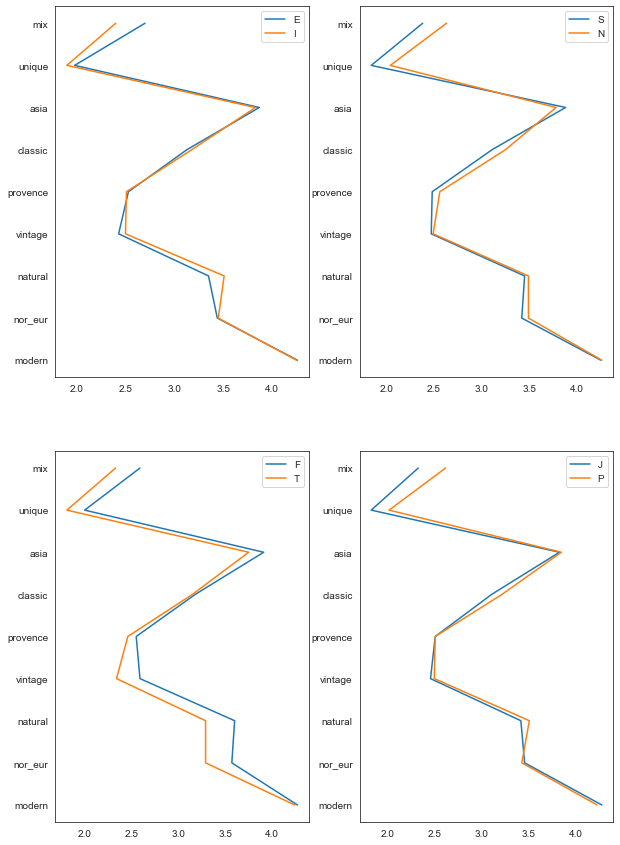

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

mood = ['modern','nor_eur',   'natural',   'vintage',   'provence',   'classic',   'asia',   'unique',   'mix']
mood_list = []
for i in mood:
    mood_list.append(round(mbti_df[mbti_df['EI']=='E'][i].mean(),2))

mood_list2 = []
for i in mood:
    mood_list2.append(round(mbti_df[mbti_df['EI']=='I'][i].mean(),2))

mood_list3 = []
for i in mood:
    mood_list3.append(round(mbti_df[mbti_df['SN']=='S'][i].mean(),2))

mood_list4 = []
for i in mood:
    mood_list4.append(round(mbti_df[mbti_df['SN']=='N'][i].mean(),2))

mood_list5 = []
for i in mood:
    mood_list5.append(round(mbti_df[mbti_df['FT']=='F'][i].mean(),2))

mood_list6 = []
for i in mood:
    mood_list6.append(round(mbti_df[mbti_df['FT']=='T'][i].mean(),2))

mood_list7 = []
for i in mood:
    mood_list7.append(round(mbti_df[mbti_df['JP']=='J'][i].mean(),2))

mood_list8 = []
for i in mood:
    mood_list8.append(round(mbti_df[mbti_df['JP']=='P'][i].mean(),2))


plt.figure(figsize=(10,15))

# 2x2 행렬의 첫번째
plt.subplot(221)
plt.plot(mood_list, mood, label='E')
plt.plot(mood_list2,mood, label='I')
plt.legend(ncol=1)

# 2x2 행렬의 두번째
plt.subplot(222)
plt.plot(mood_list3, mood,  label='S')
plt.plot(mood_list4,mood,  label='N')
plt.legend(ncol=1)



plt.subplot(223)
plt.plot(mood_list5, mood,  label='F')
plt.plot(mood_list6,mood,  label='T')
plt.legend(ncol=1)


plt.subplot(224)
plt.plot(mood_list7, mood,  label='J')
plt.plot(mood_list8,mood,  label='P')
plt.legend(ncol=1)


plt.show()

In [8]:
# like_mbti라는 새로운 데이터프레임 생성 (좋아하거나 싫어하는 무드를 모아놓은 데이터프레임)
like_mbti_mbti= ['ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP','INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP']
like_mbti = pd.DataFrame({'mbti':like_mbti_mbti})

In [9]:
like_mbti.set_index('mbti',inplace=True)

In [10]:
# modern	nor_eur	natural	vintage	provence	classic	asia	unique	mix
moods = ['modern','nor_eur','natural','vintage','provence','classic','asia','unique','mix']
for mood in moods:
    like_mbti[mood+'_like'] = 0
    like_mbti[mood+'_hate'] = 0
like_mbti

modern_like  modern_hate  nor_eur_like  nor_eur_hate  natural_like  \
mbti                                                                       
ENFJ            0            0             0             0             0   
ENFP            0            0             0             0             0   
ENTJ            0            0             0             0             0   
ENTP            0            0             0             0             0   
ESFJ            0            0             0             0             0   
ESFP            0            0             0             0             0   
ESTJ            0            0             0             0             0   
ESTP            0            0             0             0             0   
INFJ            0            0             0             0             0   
INFP            0            0             0             0             0   
INTJ            0            0             0             0             0   
INTP            0            0             0             0             0   
ISFJ            0            0             0             0             0   
ISFP            0            0             0             0             0   
ISTJ            0            0             0             0             0   
ISTP            0            0             0             0             0   

      natural_hate  vintage_like  vintage_hate  provence_like  provence_hate  \
mbti                                                                           
ENFJ             0             0             0              0              0   
ENFP             0             0             0              0              0   
ENTJ             0             0             0              0              0   
ENTP             0             0             0              0              0   
ESFJ             0             0             0              0              0   
ESFP             0             0             0              0              0   
ESTJ             0             0             0              0              0   
ESTP             0             0             0              0              0   
INFJ             0             0             0              0              0   
INFP             0             0             0              0              0   
INTJ             0             0             0              0              0   
INTP             0             0             0              0              0   
ISFJ             0             0             0              0              0   
ISFP             0             0             0              0              0   
ISTJ             0             0             0              0              0   
ISTP             0             0             0              0              0   

      classic_like  classic_hate  asia_like  asia_hate  unique_like  \
mbti                                                                  
ENFJ             0             0          0          0            0   
ENFP             0             0          0          0            0   
ENTJ             0             0          0          0            0   
ENTP             0             0          0          0            0   
ESFJ             0             0          0          0            0   
ESFP             0             0          0          0            0   
ESTJ             0             0          0          0            0   
ESTP             0             0          0          0            0   
INFJ             0             0          0          0            0   
INFP             0             0          0          0            0   
INTJ             0             0          0          0            0   
INTP             0             0          0          0            0   
ISFJ             0             0          0          0            0   
ISFP             0             0          0          0            0   
ISTJ             0             0          0          0      

In [11]:
# 5점을 준 mbti 뽑기
# modern	nor_eur	natural	vintage	provence	classic	asia	unique	mix
moods = ['modern','nor_eur','natural','vintage','provence','classic','asia','unique','mix']

for mood in moods:
    a = 1
    like_mbti_5_score= mbti_df['real_mbti'][mbti_df[mood]==5].values
    like_mbti_1_score= mbti_df['real_mbti'][mbti_df[mood]==1].values
    
    if a == 1:
        count= {}
        for lst in like_mbti_5_score:
            try: count[lst]+= 1
            except: count[lst]=1

        for key, value in sorted(count.items()):
            like_mbti[mood+'_like'][key] = value
        a = 0
            
    if a == 0:
        count= {}
        for lst in like_mbti_1_score:
            try: count[lst]+= 1
            except: count[lst]=1

        for key, value in sorted(count.items()):
            like_mbti[mood+'_hate'][key] = value

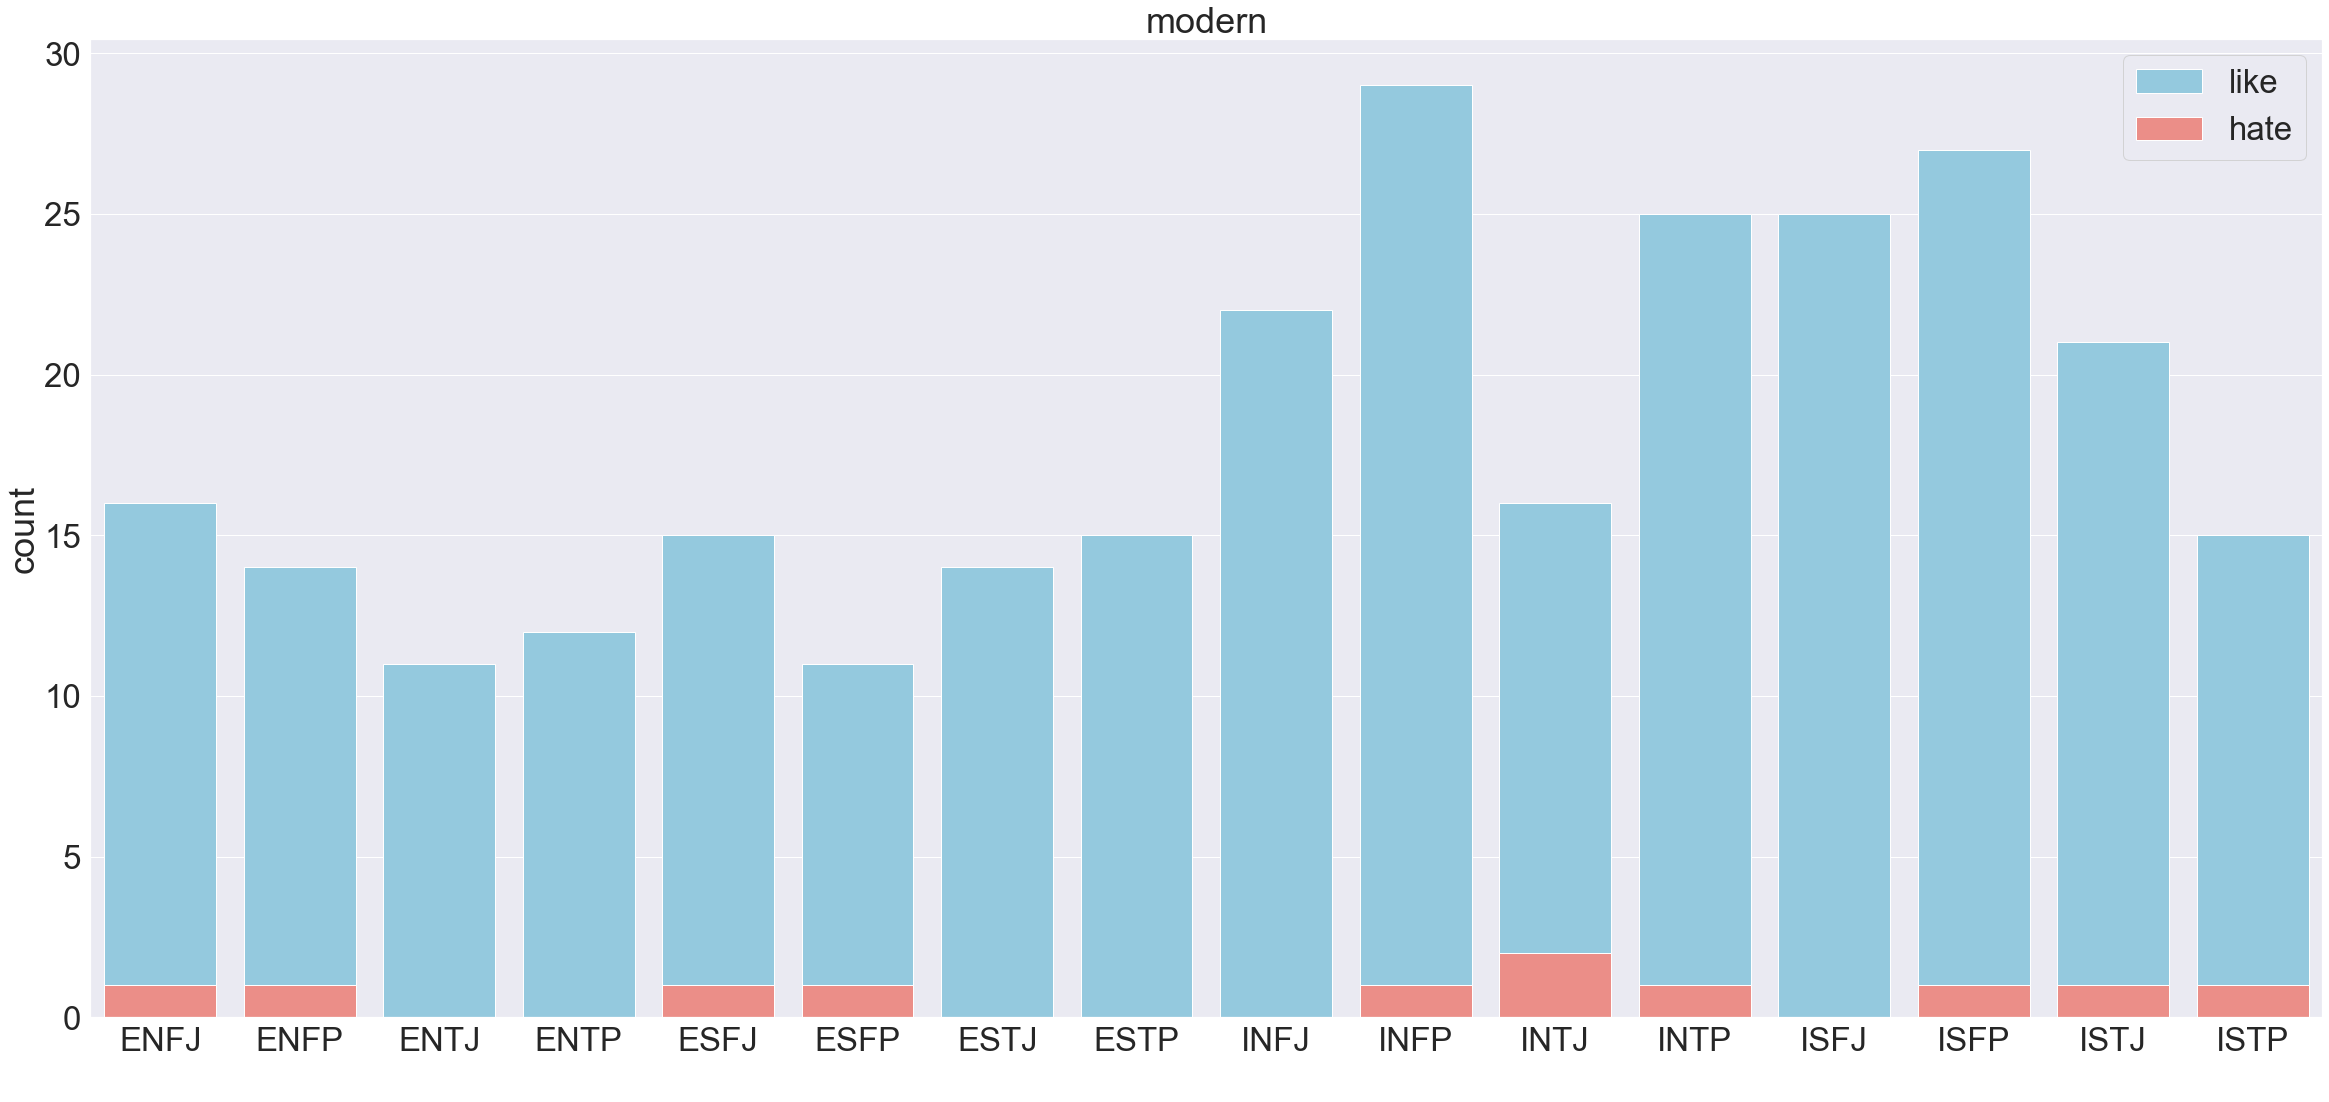

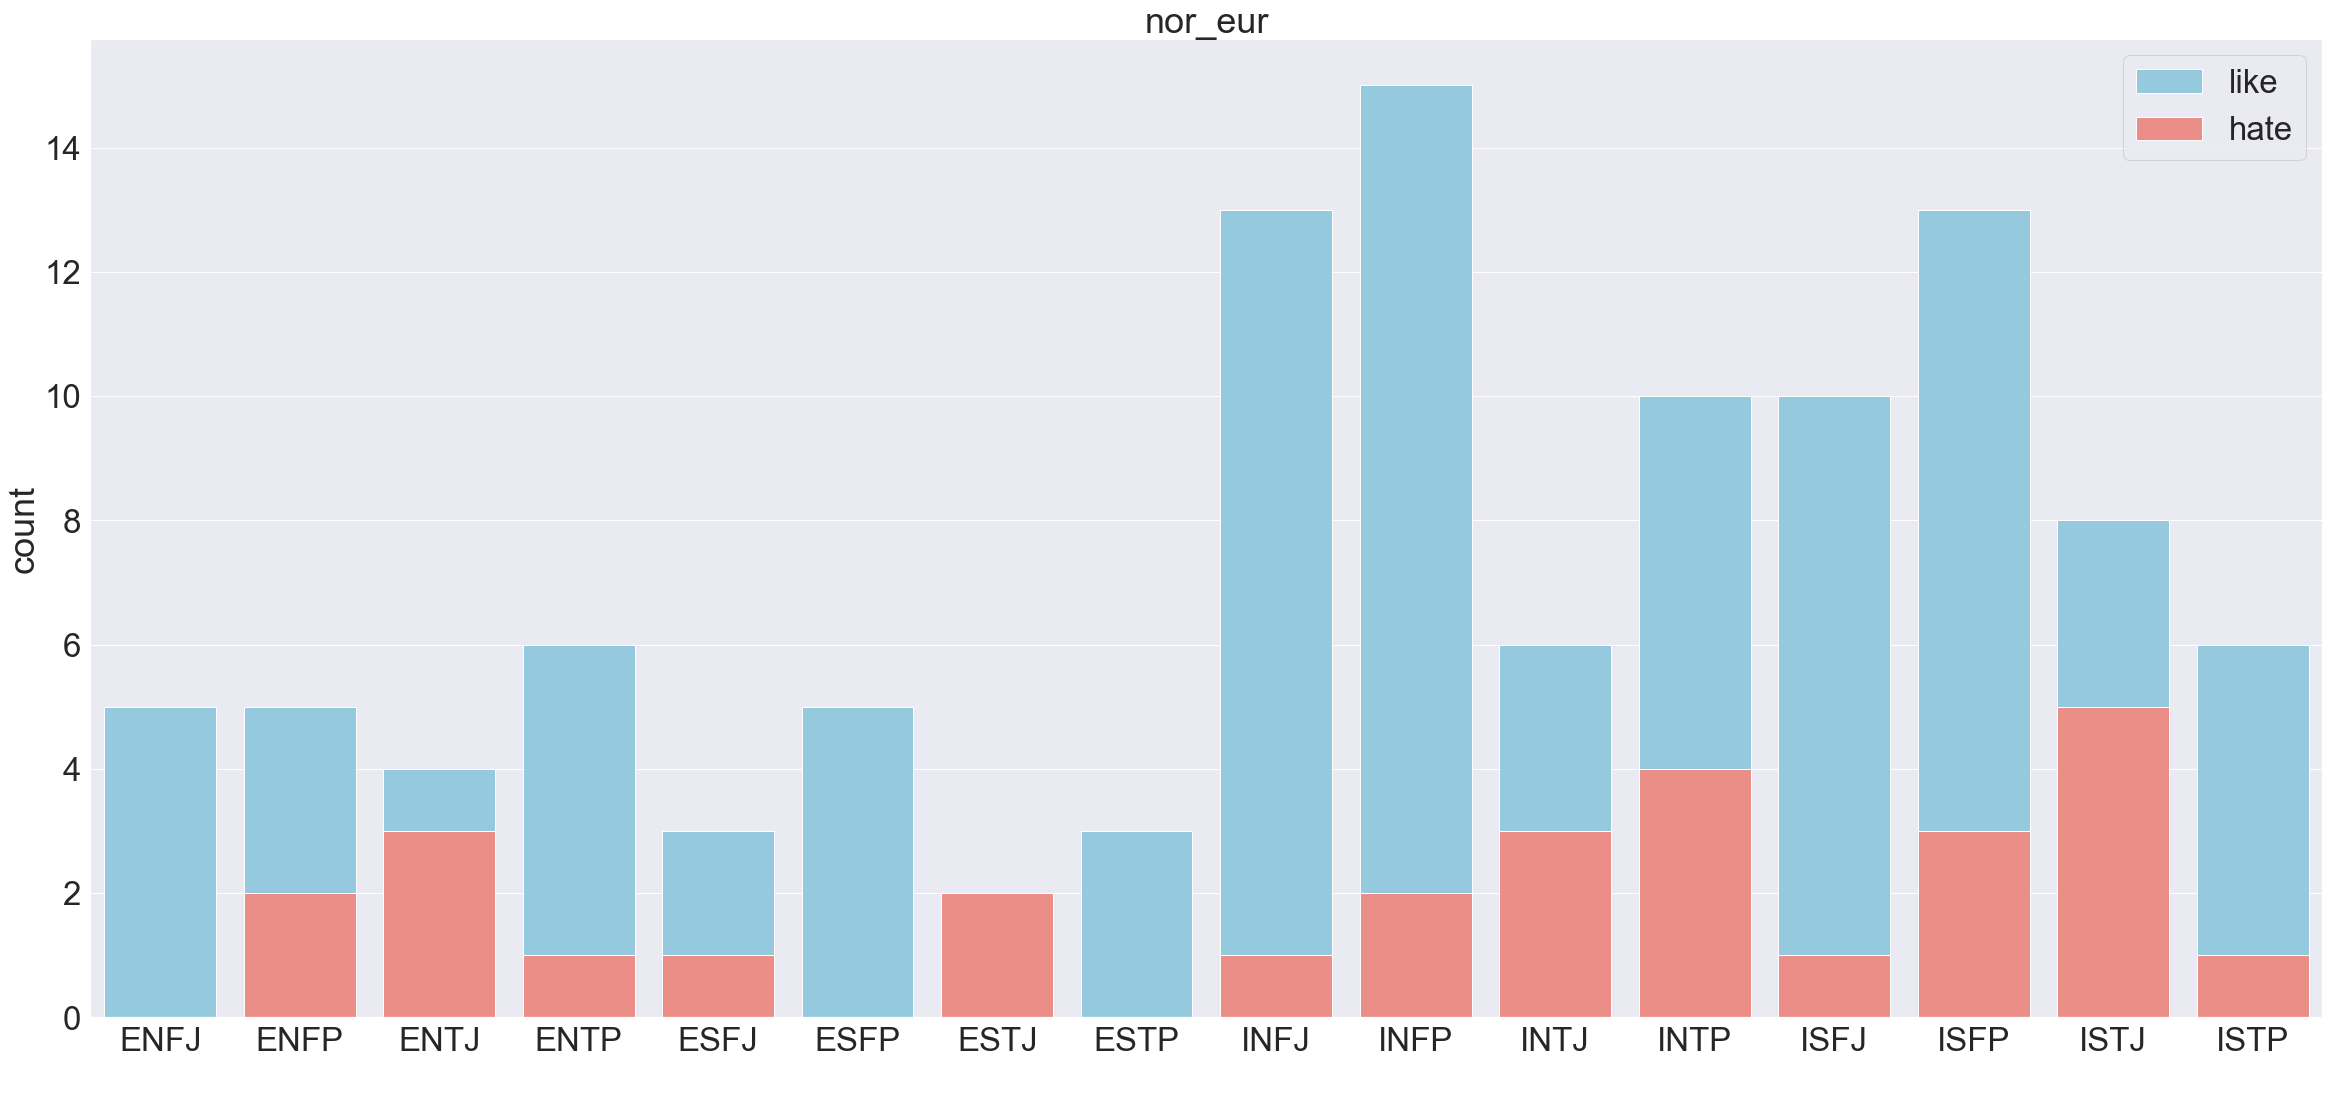

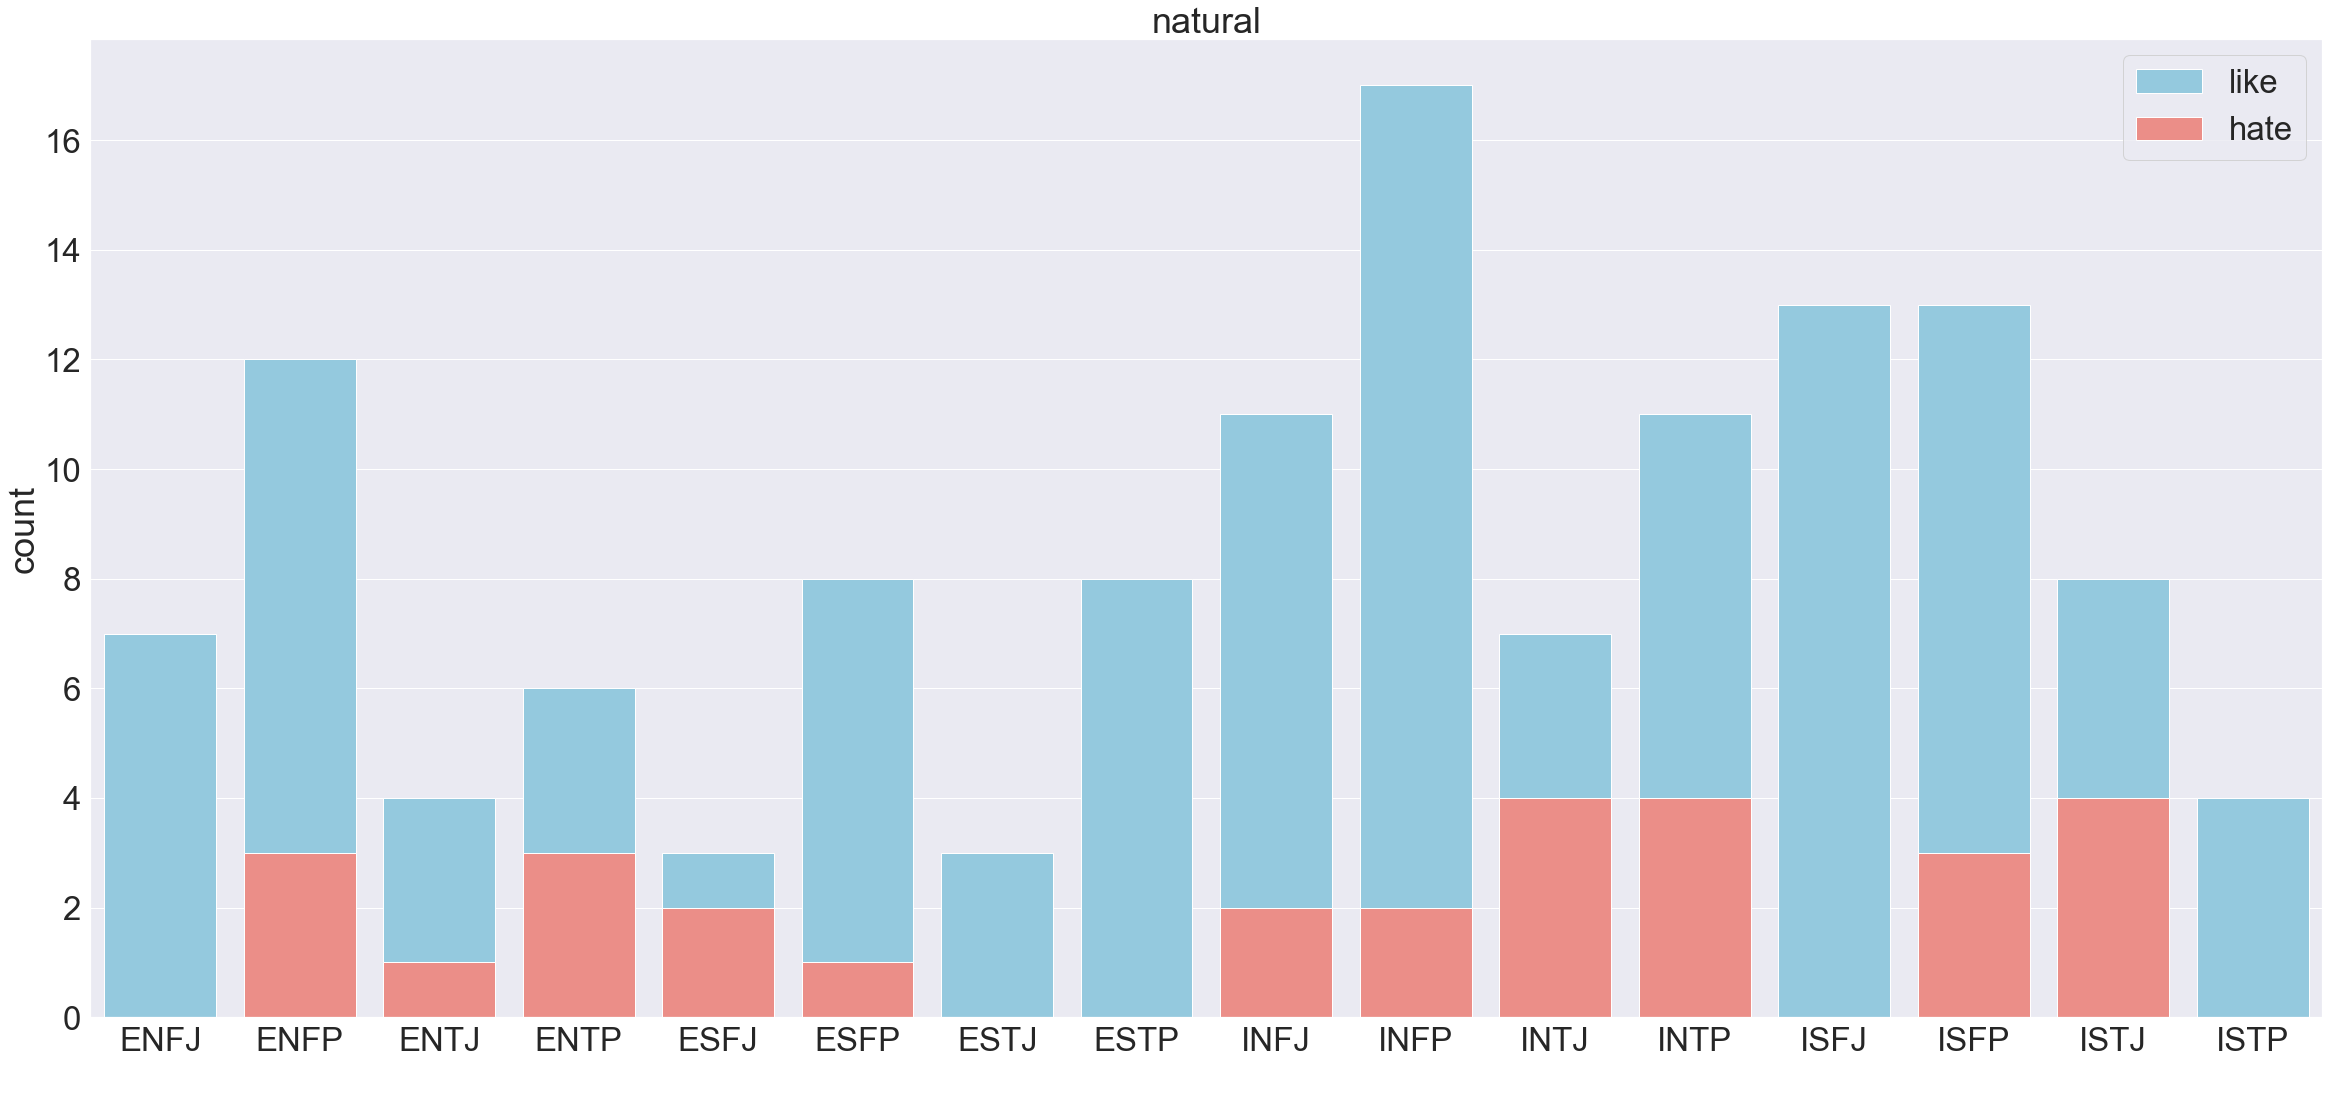

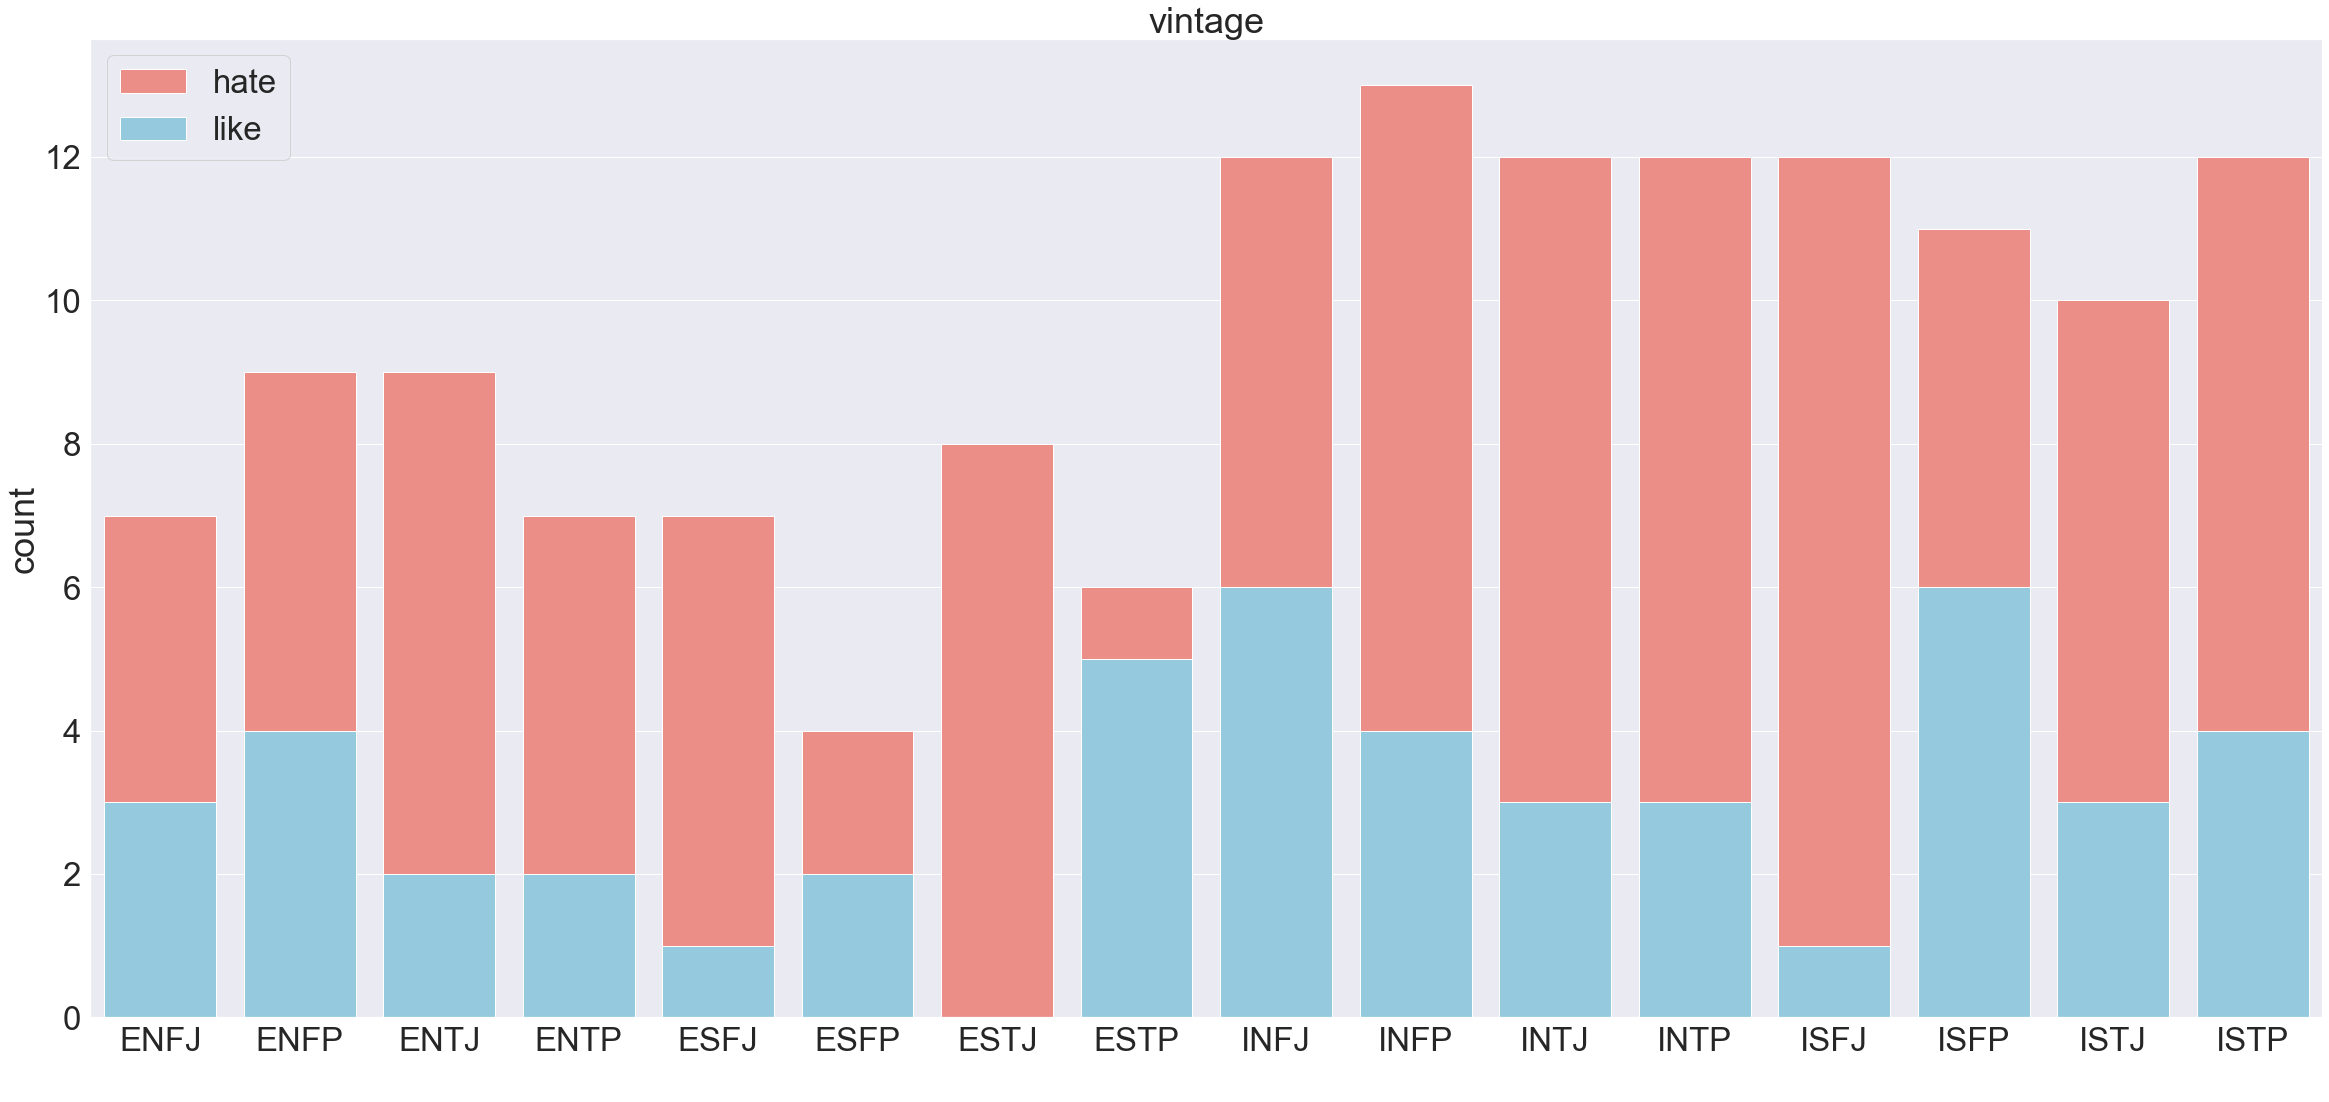

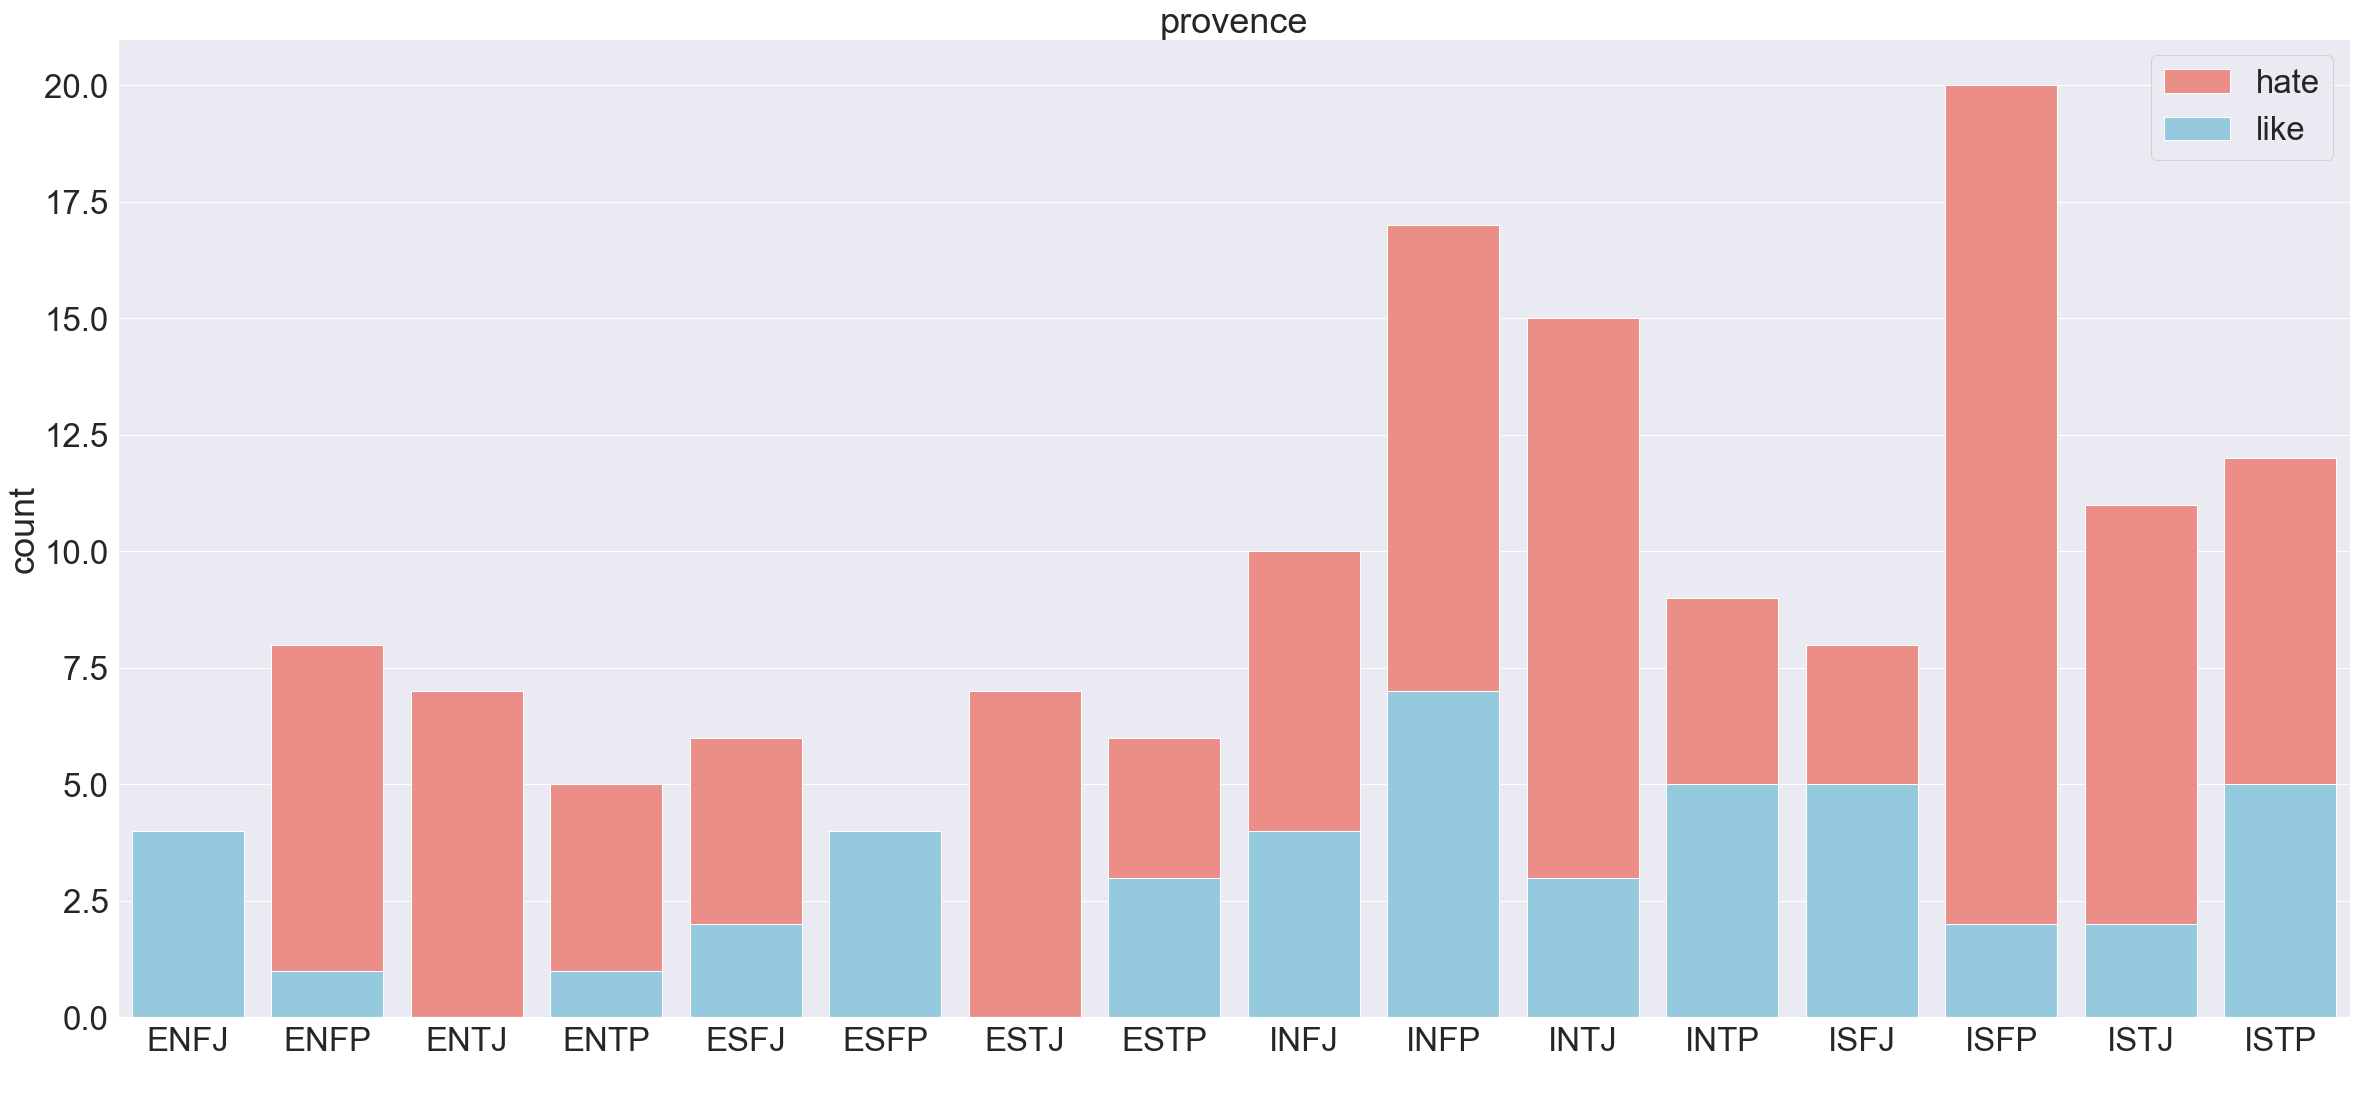

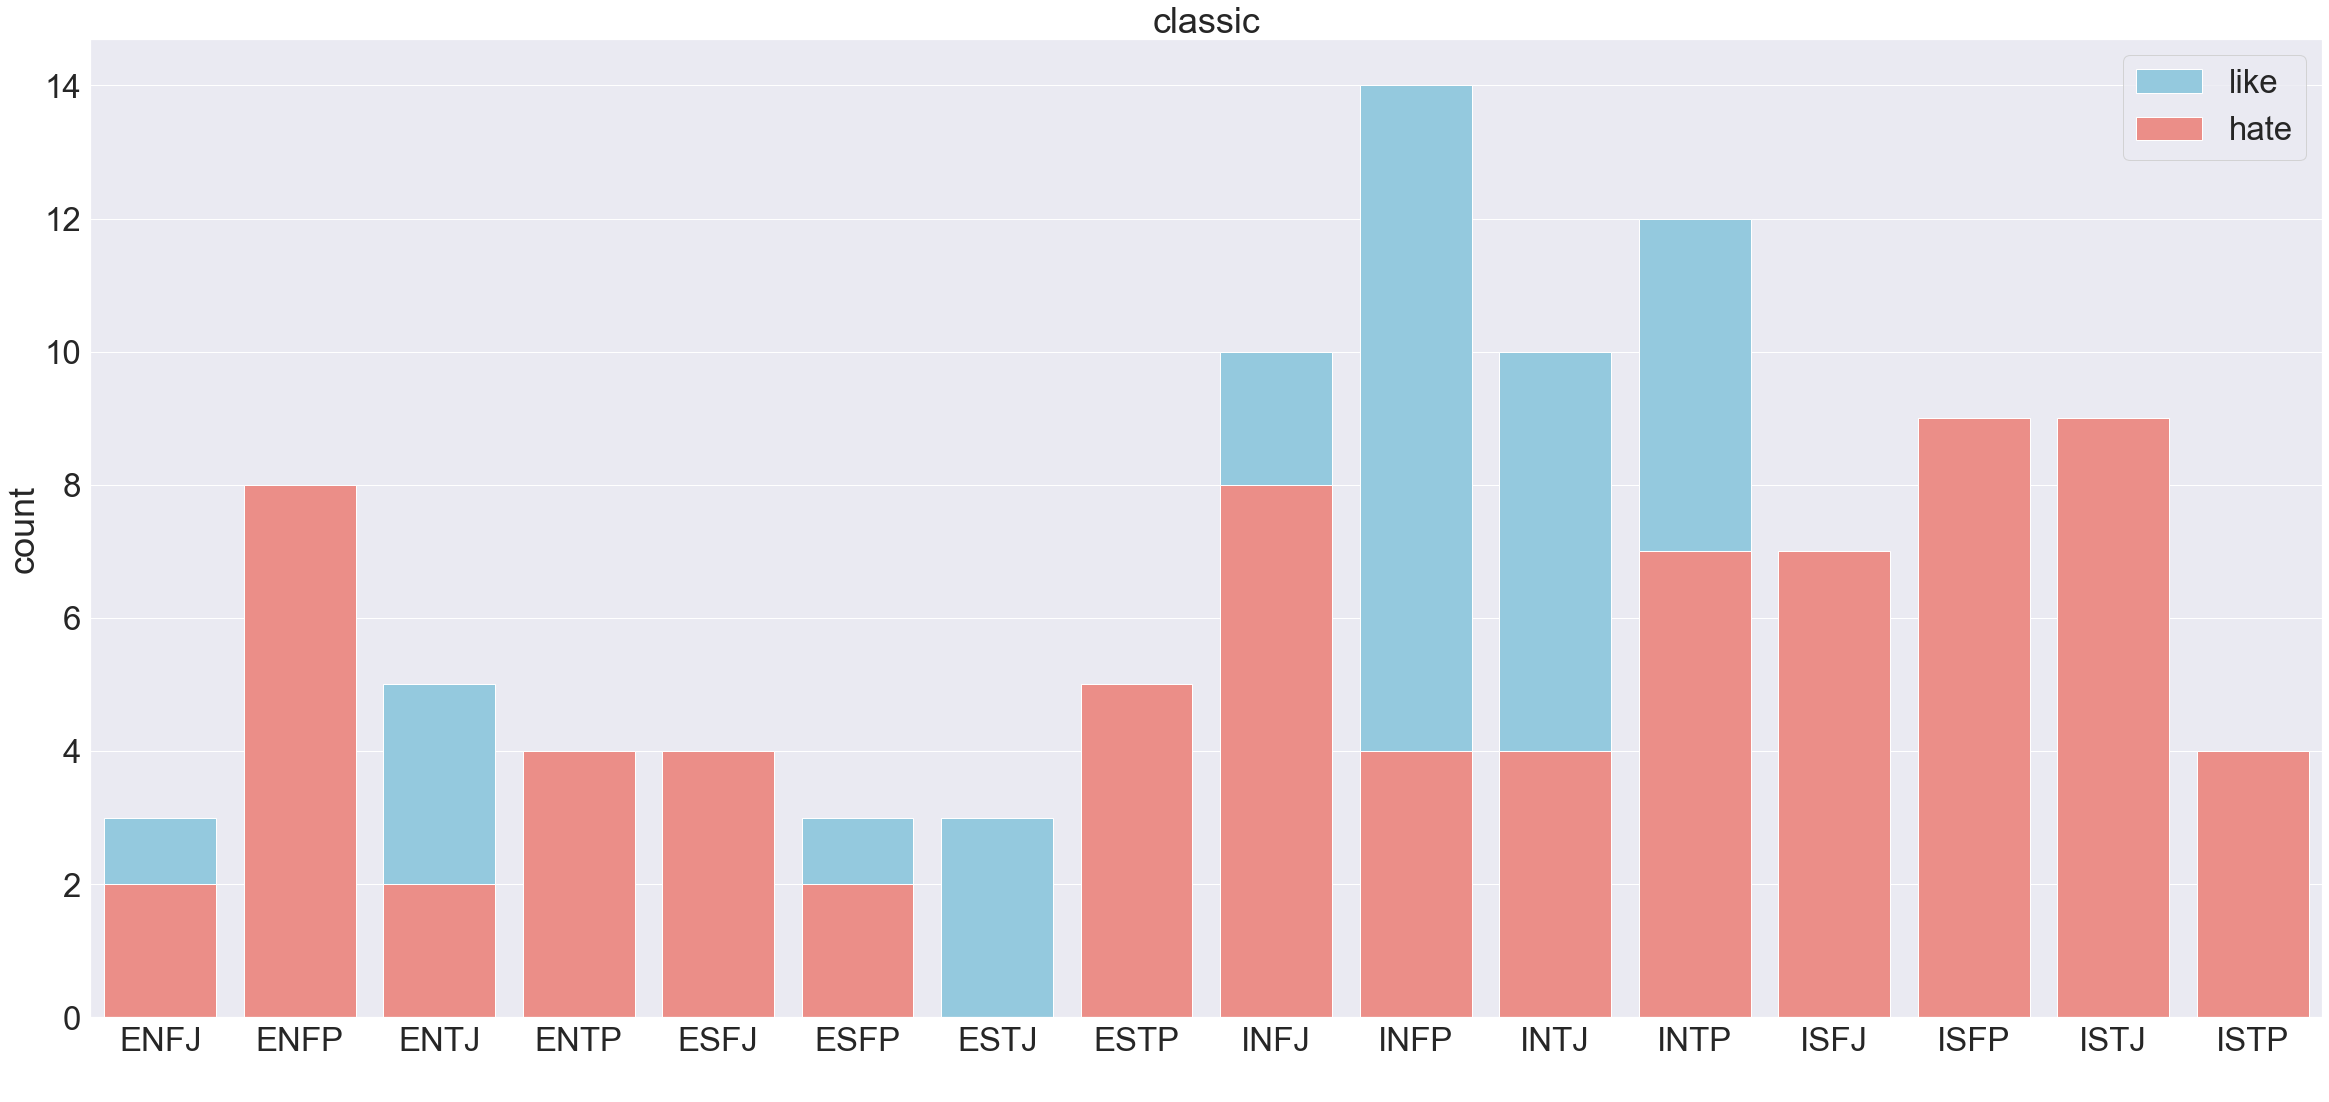

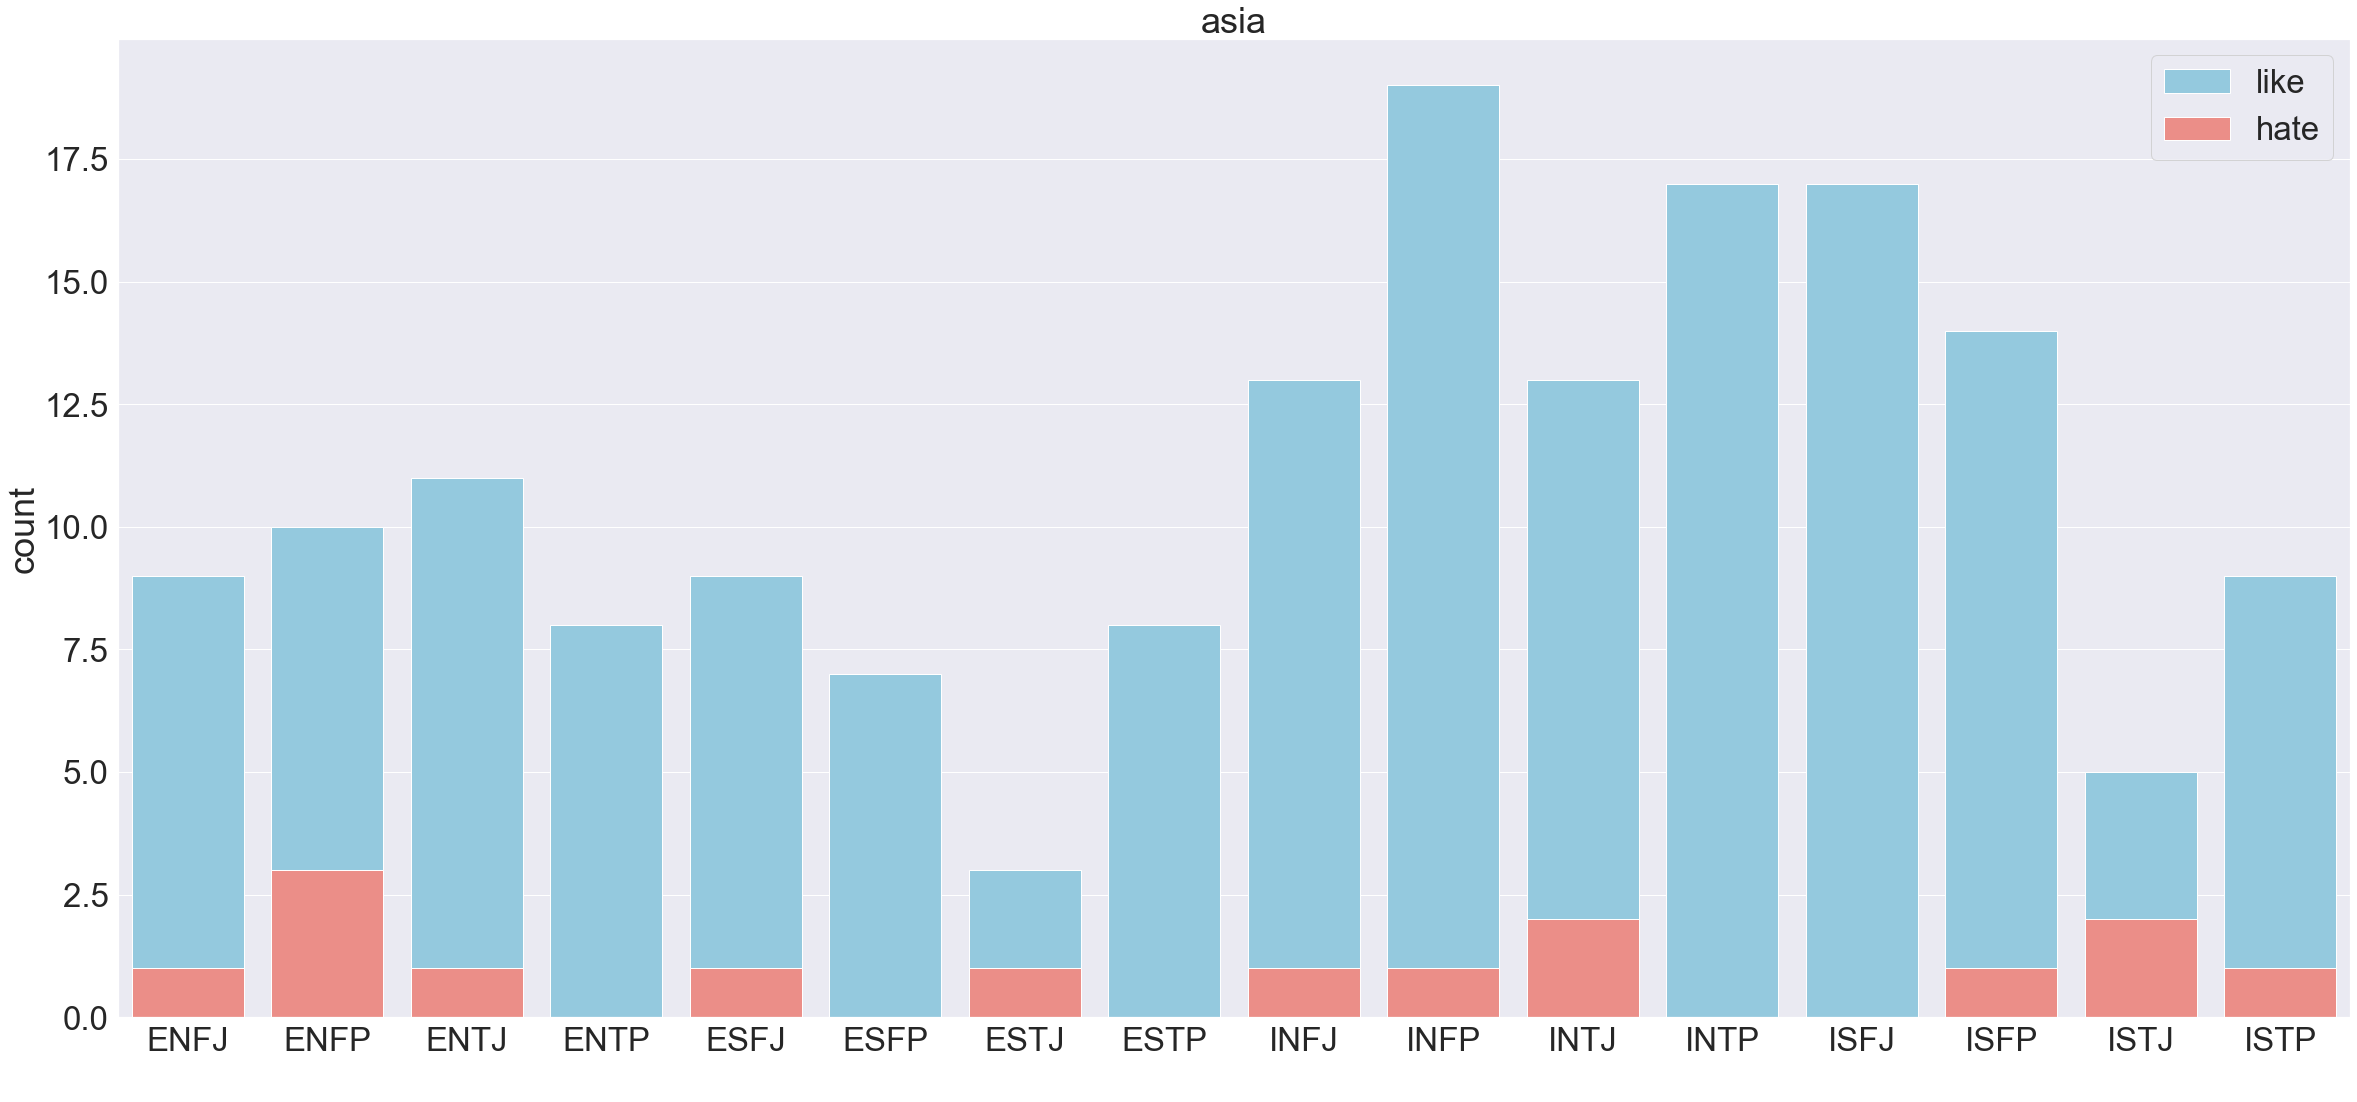

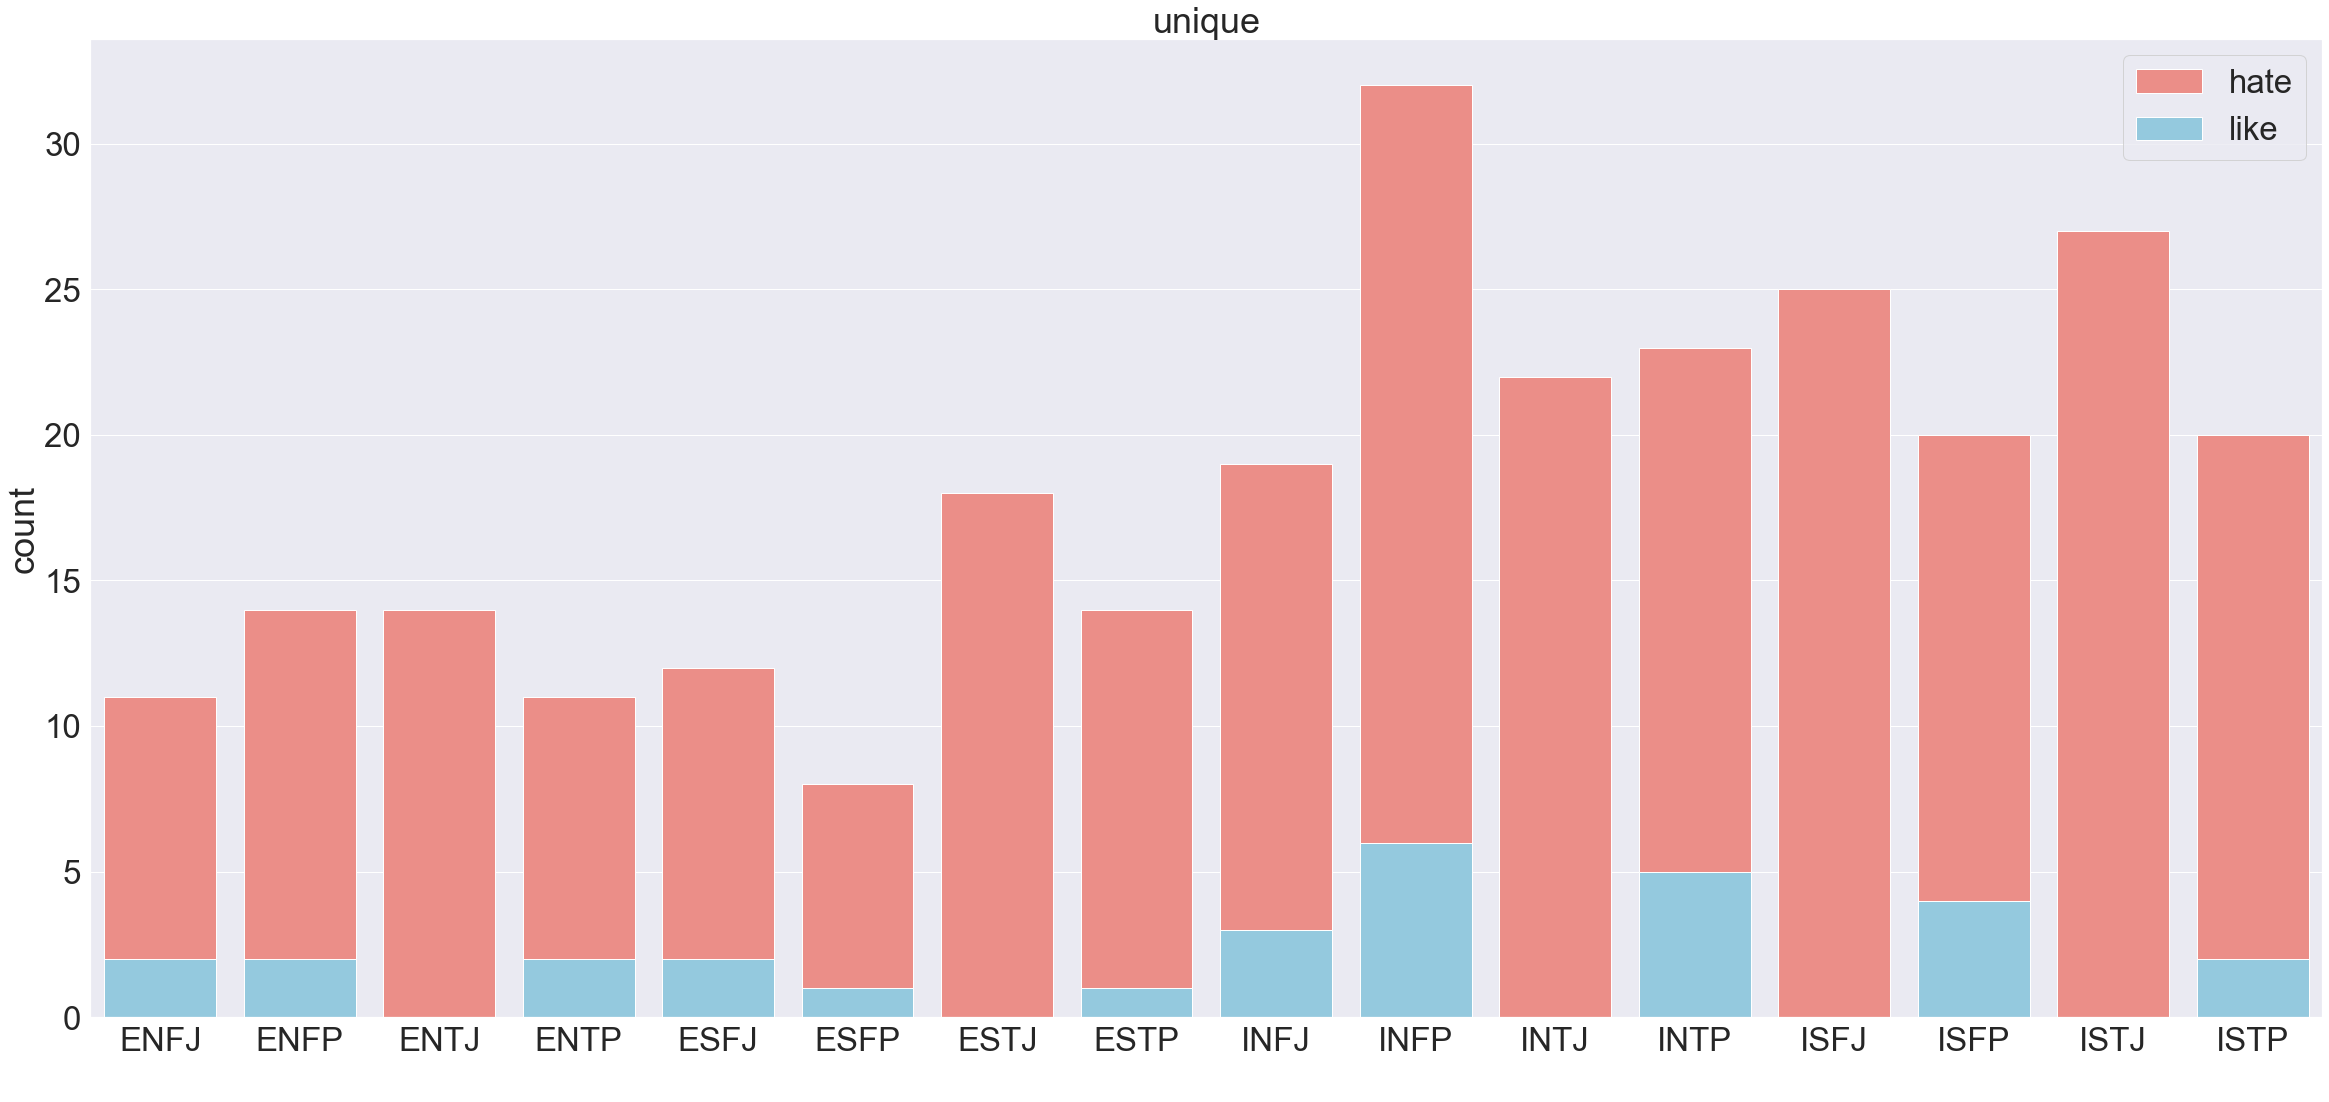

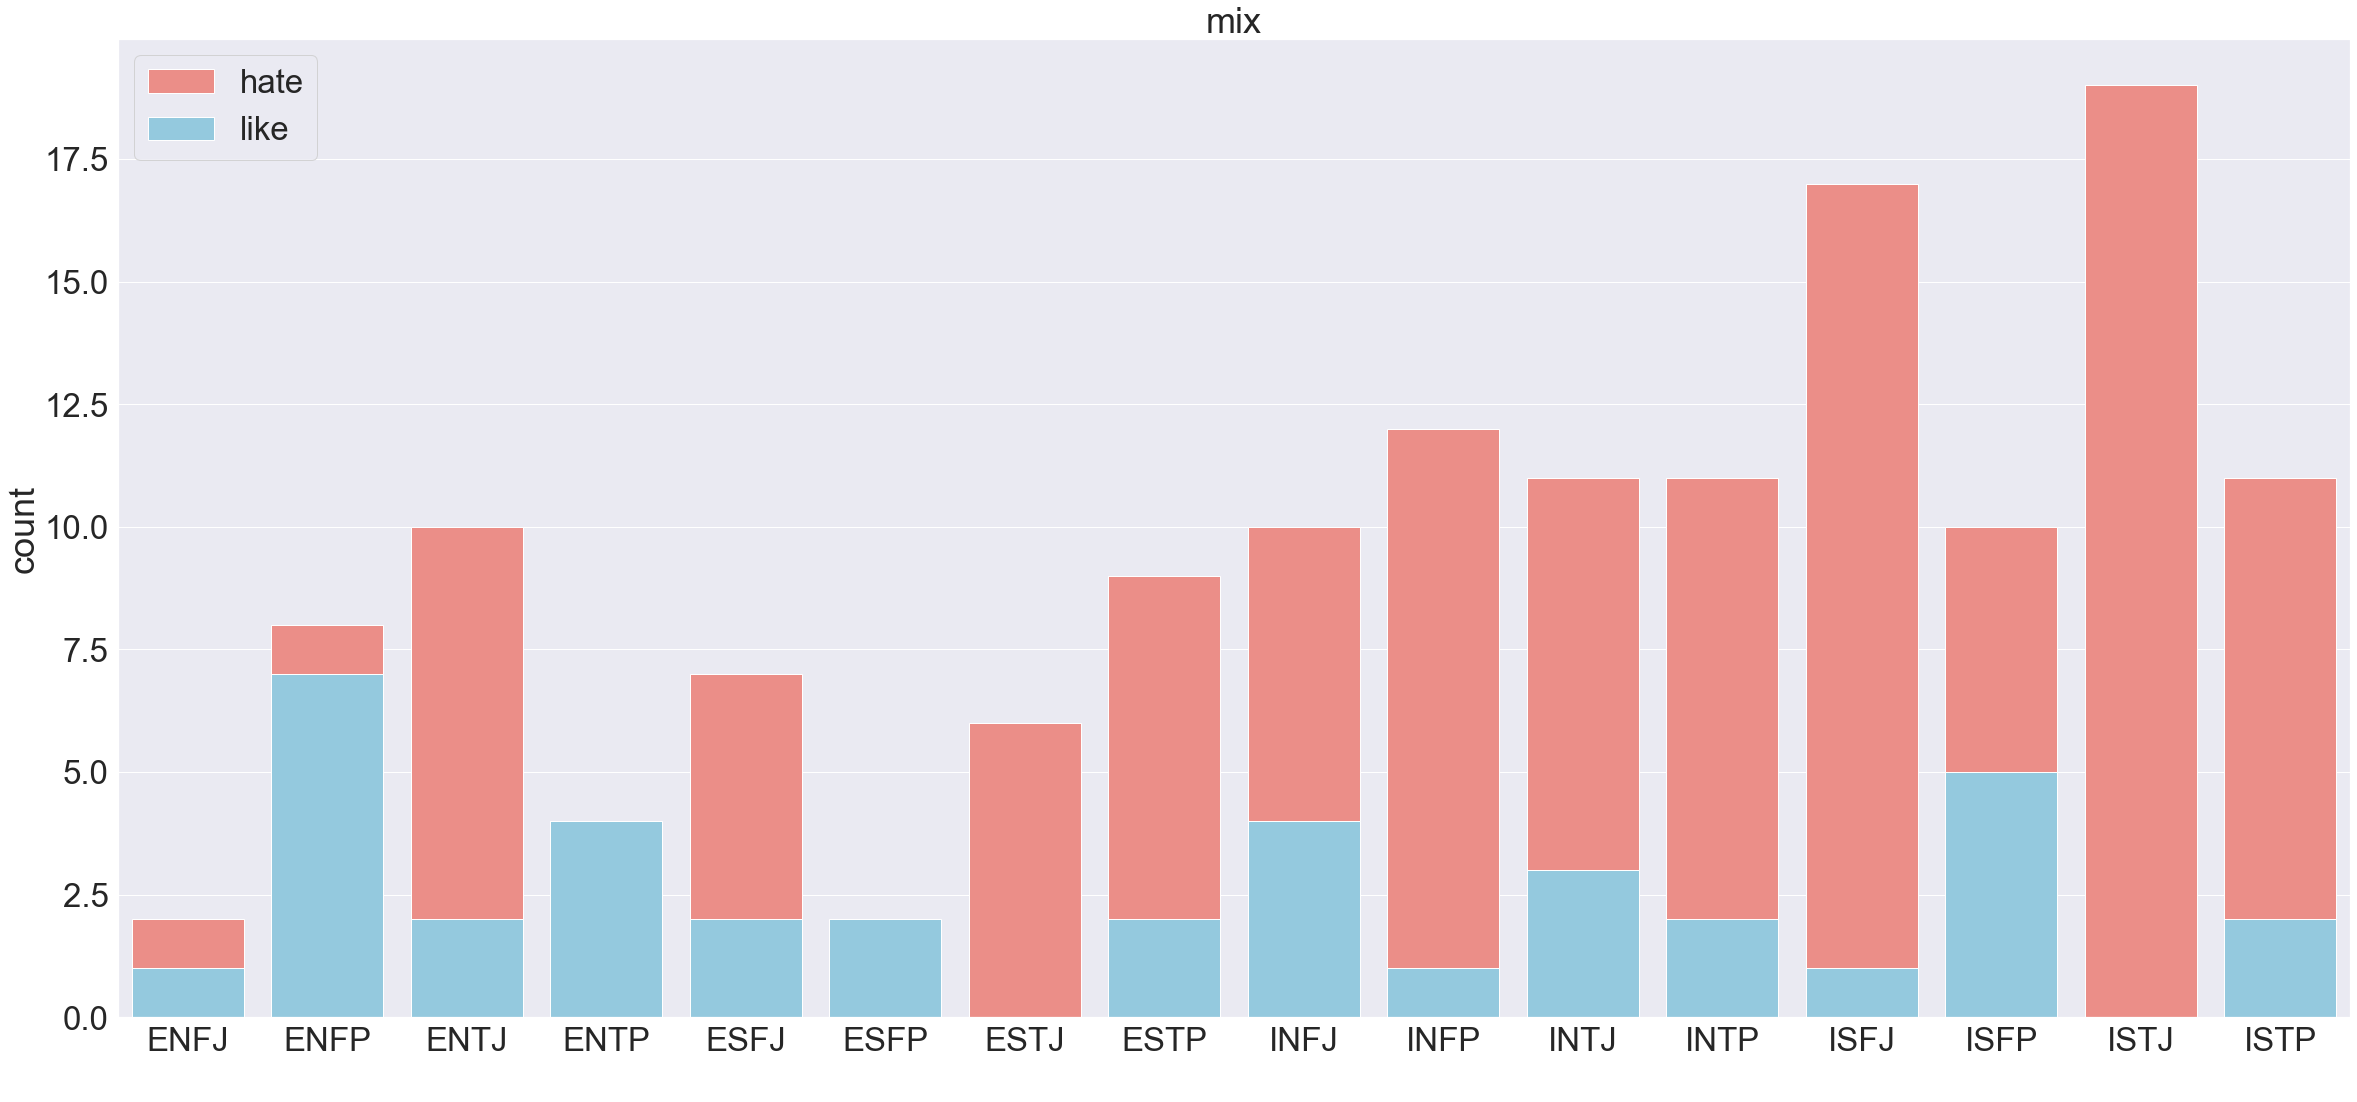

In [12]:
# 각각 무드의 5점과 1점 mbti 그래프
moods = ['modern','nor_eur','natural','vintage','provence','classic','asia','unique','mix']
for mood in moods:
    fig = plt.figure(figsize=(40,18))

    sns.set(font_scale=3)
    
    score_5 = like_mbti[mood+'_like'].values.sum()
    score_1 = like_mbti[mood+'_hate'].values.sum()
    
    if score_5 > score_1:
        sns.barplot(x=like_mbti.index,y=mood+'_like', color = 'skyblue',data=like_mbti,label='like')
        sns.barplot(x=like_mbti.index,y=mood+'_hate', color = '#FC7F77',data=like_mbti,label='hate')
        plt.title(mood)
        plt.xlabel(' ')
        plt.ylabel('count')
        plt.legend()
    elif score_1 >= score_5:
        sns.barplot(x=like_mbti.index,y=mood+'_hate', color = '#FC7F77',data=like_mbti,label='hate')
        sns.barplot(x=like_mbti.index,y=mood+'_like', color = 'skyblue',data=like_mbti,label='like')
        plt.title(mood)
        plt.xlabel(' ')
        plt.ylabel('count')
        plt.legend()
    plt.show()

In [13]:
# copy를 하지않고 그냥 변수로 저장하게 되면 like_mbti가 like_mbti1으로 덮어지므로 copy 사용
like_mbti1 = like_mbti.copy()
# mbti별 좋아하는(5점) 무드 비율을 보기 위해 새로운 데이터프레임 생성
mood_like_mbti = like_mbti1
for mood in moods:
    mood_like_mbti[mood] = like_mbti1[mood+'_like']
    del(mood_like_mbti[mood+'_like'])
    del(mood_like_mbti[mood+'_hate'])

In [14]:
mood_like_mbti = mood_like_mbti.transpose()

In [15]:
mood_like_mbti

mbti      ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  \
modern      16    14    11    12    15    11    14    15    22    29    16   
nor_eur      5     5     4     6     3     5     2     3    13    15     6   
natural      7    12     4     6     3     8     3     8    11    17     7   
vintage      3     4     2     2     1     2     0     5     6     4     3   
provence     4     1     0     1     2     4     0     3     4     7     3   
classic      3     5     5     4     1     3     3     4    10    14    10   
asia         9    10    11     8     9     7     3     8    13    19    13   
unique       2     2     0     2     2     1     0     1     3     6     0   
mix          1     7     2     4     2     2     0     2     4     1     3   

mbti      INTP  ISFJ  ISFP  ISTJ  ISTP  
modern      25    25    27    21    15  
nor_eur     10    10    13     8     6  
natural     11    13    13     8     4  
vintage      3     1     6     3     4  
provence     5     5     2     2     5  
classic     12     5     9     7     3  
asia        17    17    14     5     9  
unique       5     0     4     0     2  
mix          2     1     5     0     2

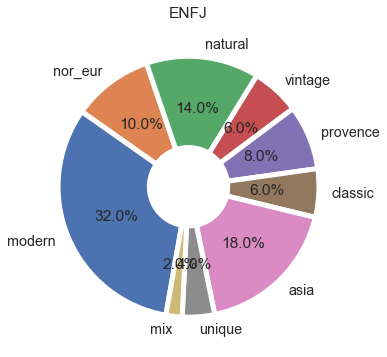

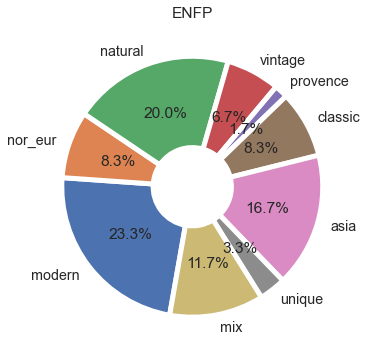

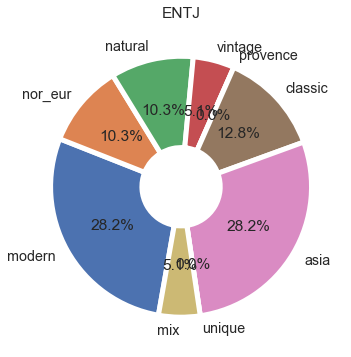

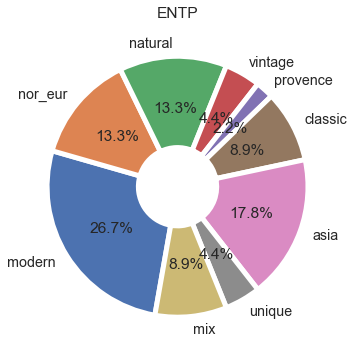

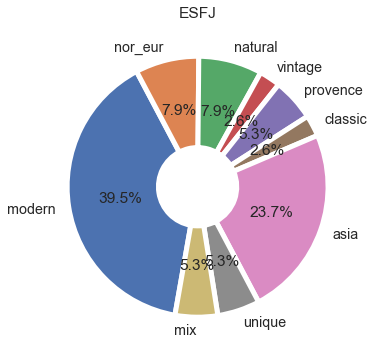

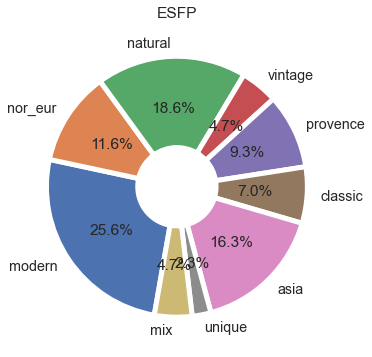

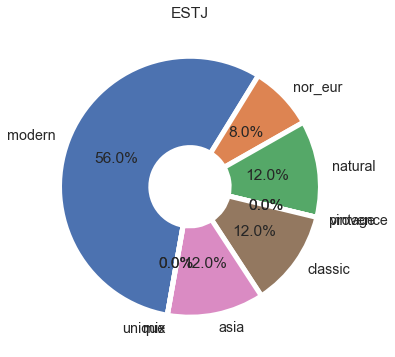

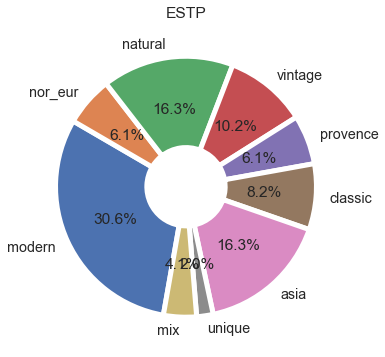

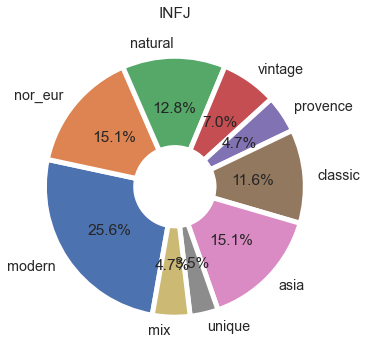

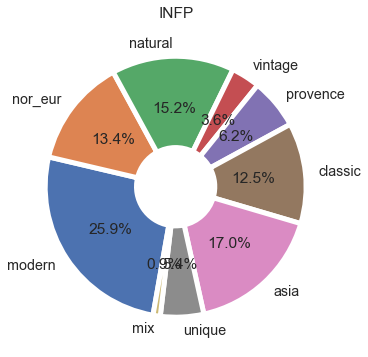

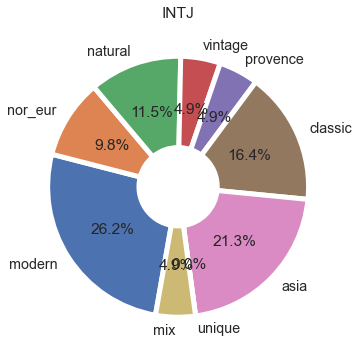

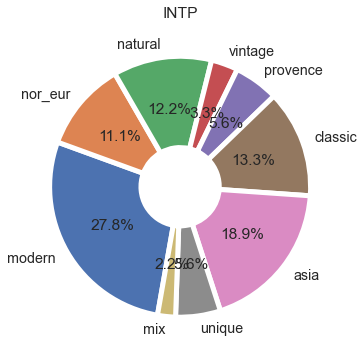

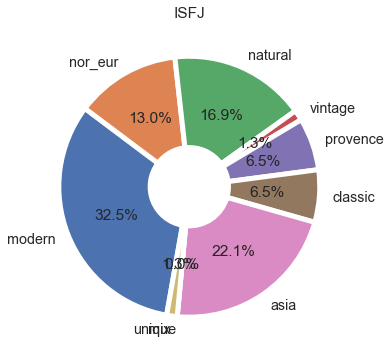

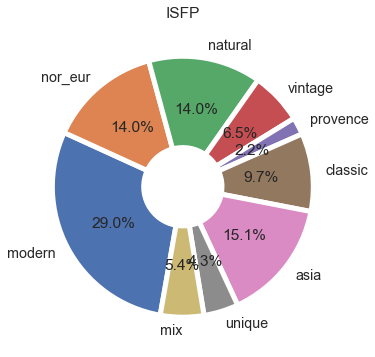

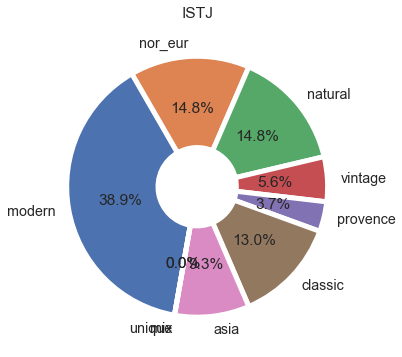

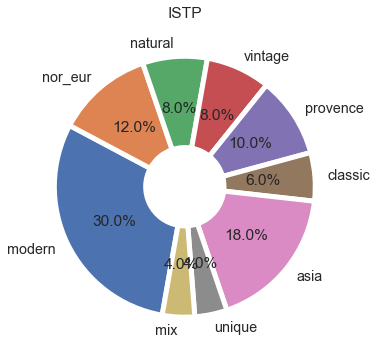

In [16]:
# mbti 컬럼값
mbtis = mood_like_mbti.columns

for mbti in mbtis:
    fig = plt.figure(figsize=(18,6))
    sns.set(font_scale=1.3)
    # 비율
    ratio = mood_like_mbti[mbti]
    # 이름
    labels = mood_like_mbti.index[:]
    plt.title(mbti)
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
    plt.show()

In [17]:
like_mbti2 = like_mbti
# mbti별 싫어하는(1점) 무드 비율을 보기 위해 새로운 데이터프레임 생성
mood_hate_mbti = like_mbti2
for mood in moods:
    mood_hate_mbti[mood] = like_mbti2[mood+'_hate']
    del(mood_hate_mbti[mood+'_like'])
    del(mood_hate_mbti[mood+'_hate'])

In [18]:
mood_hate_mbti = mood_hate_mbti.transpose()

In [19]:
mood_hate_mbti

mbti      ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  \
modern       1     1     0     0     1     1     0     0     0     1     2   
nor_eur      0     2     3     1     1     0     2     0     1     2     3   
natural      0     3     1     3     2     1     0     0     2     2     4   
vintage      7     9     9     7     7     4     8     6    12    13    12   
provence     2     8     7     5     6     2     7     6    10    17    15   
classic      2     8     2     4     4     2     0     5     8     4     4   
asia         1     3     1     0     1     0     1     0     1     1     2   
unique      11    14    14    11    12     8    18    14    19    32    22   
mix          2     8    10     4     7     2     6     9    10    12    11   

mbti      INTP  ISFJ  ISFP  ISTJ  ISTP  
modern       1     0     1     1     1  
nor_eur      4     1     3     5     1  
natural      4     0     3     4     0  
vintage     12    12    11    10    12  
provence     9     8    20    11    12  
classic      7     7     9     9     4  
asia         0     0     1     2     1  
unique      23    25    20    27    20  
mix         11    17    10    19    11

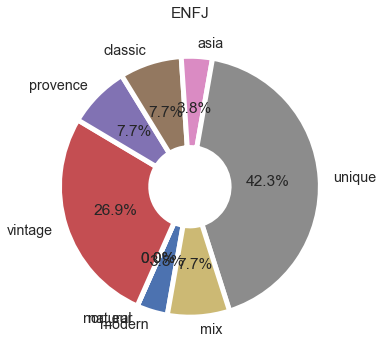

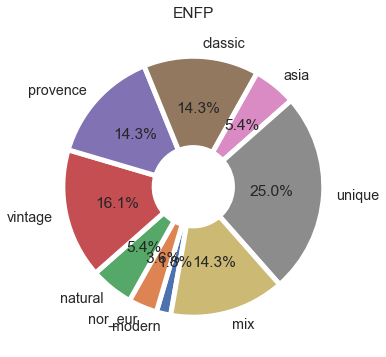

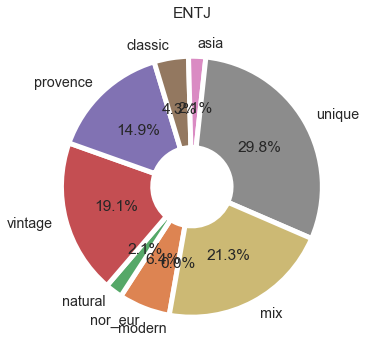

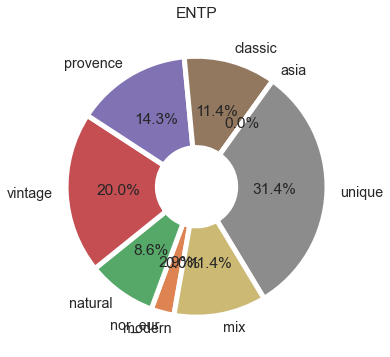

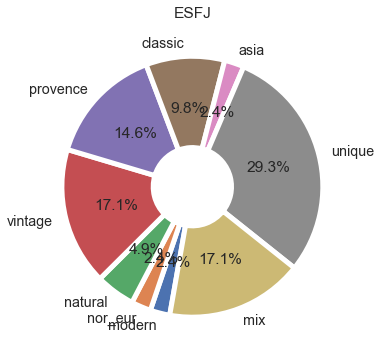

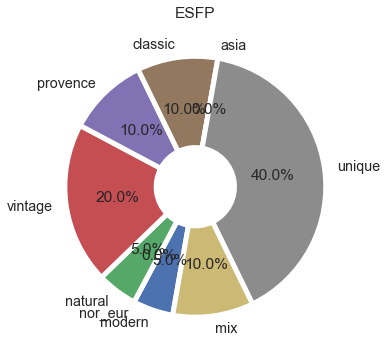

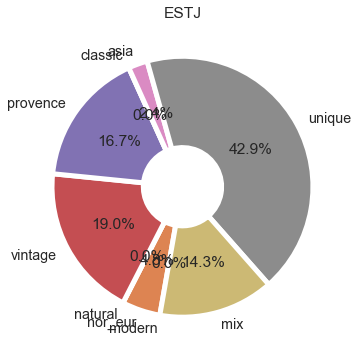

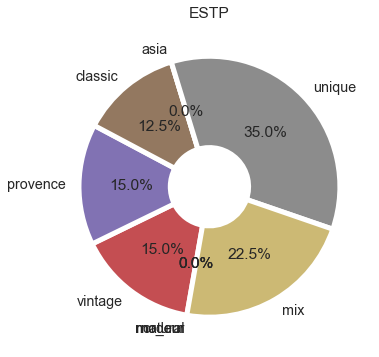

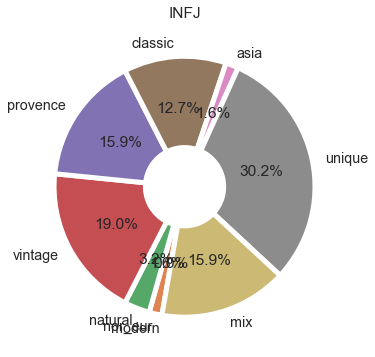

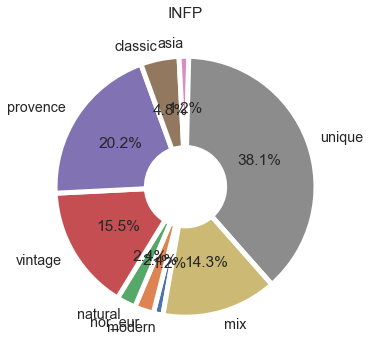

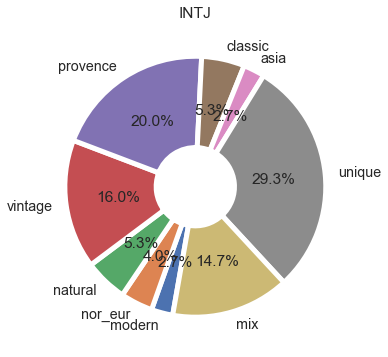

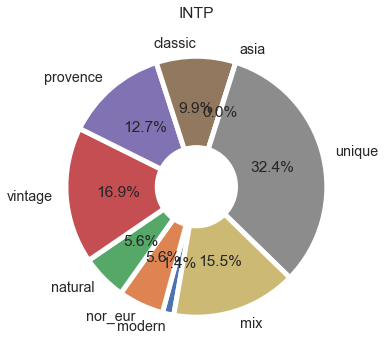

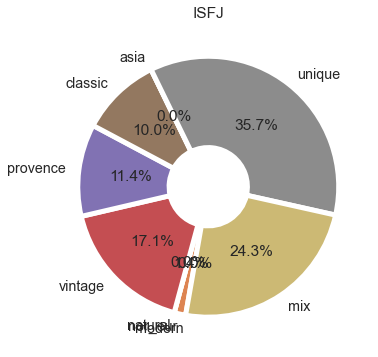

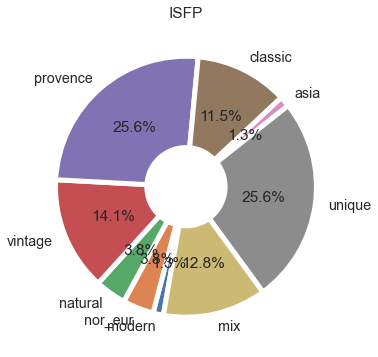

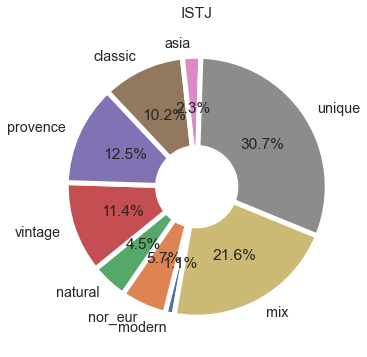

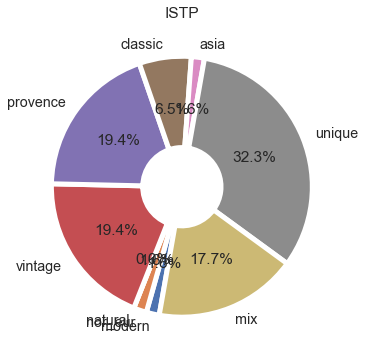

In [20]:
# mbti 컬럼값
mbtis = mood_hate_mbti.columns

for mbti in mbtis:
    fig = plt.figure(figsize=(18,6))
    sns.set(font_scale=1.3)
    # 비율
    ratio = mood_hate_mbti[mbti]
    # 이름
    labels = mood_hate_mbti.index[:]
    plt.title(mbti)
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
    plt.show()

# 성향 두개씩 묶어서 보기

In [21]:
# 성향 4개 항목 2개 조합
personality_2ea = []

# mbti 성향 4개
personality = [['E', 'I'], ['S', 'N'], ['F', 'T'], ['J', 'P']]

for i in list(combinations(personality, 2)): # 항목 4개중 2개 선택 (4C2)
    for j in list(product(*i)): # 2개 선택한 것들에서 2개 중 1개씩 선택 (2C1 x 2C1)
        personality_2ea.append(str(j[0] + j[1])) # str으로 바꿔서 리스트로
personality_2ea = np.array(personality_2ea).astype('object')
personality_2ea

array(['ES', 'EN', 'IS', 'IN', 'EF', 'ET', 'IF', 'IT', 'EJ', 'EP', 'IJ',
       'IP', 'SF', 'ST', 'NF', 'NT', 'SJ', 'SP', 'NJ', 'NP', 'FJ', 'FP',
       'TJ', 'TP'], dtype=object)

In [22]:
df2 = mbti_df.copy()
df2 = df2[['real_mbti', 'real_EI', 'real_SN', 'real_FT', 'real_JP']]
df2[personality_2ea] = 0
df2

real_mbti real_EI real_SN real_FT real_JP  ES  EN  IS  IN  EF  ET  IF  IT  \
0        INTP       I       N       T       P   0   0   0   0   0   0   0   0   
1        INFP       I       N       F       P   0   0   0   0   0   0   0   0   
2        ISTP       I       S       T       P   0   0   0   0   0   0   0   0   
3        INFJ       I       N       F       J   0   0   0   0   0   0   0   0   
4        ESTP       E       S       T       P   0   0   0   0   0   0   0   0   
..        ...     ...     ...     ...     ...  ..  ..  ..  ..  ..  ..  ..  ..   
588      ESTJ       E       S       T       J   0   0   0   0   0   0   0   0   
589      INFP       I       N       F       P   0   0   0   0   0   0   0   0   
590      ISTP       I       S       T       P   0   0   0   0   0   0   0   0   
591      ISTJ       I       S       T       J   0   0   0   0   0   0   0   0   
592      ISTP       I       S       T       P   0   0   0   0   0   0   0   0   

     EJ  EP  IJ  IP  SF  ST  NF  NT  SJ  SP  NJ  NP  FJ  FP  TJ  TP  
0     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
1     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
2     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
3     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
4     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
588   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
589   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
590   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
591   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
592   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

[593 rows x 29 columns]

In [23]:
for i in range(len(df2.index)):
    mbli1 = []
    for j in df2.loc[i, "real_EI":"real_JP"]:
        mbli1.append(j)
    mbli1 = list(combinations(mbli1, 2))
    mbli2 = []
    for k in mbli1:
        mbli2.append(k[0]+k[1])
    for col in df2.columns:
        if col in mbli2:
            df2.loc[i, (col)] = 1
df2

real_mbti real_EI real_SN real_FT real_JP  ES  EN  IS  IN  EF  ET  IF  IT  \
0        INTP       I       N       T       P   0   0   0   1   0   0   0   1   
1        INFP       I       N       F       P   0   0   0   1   0   0   1   0   
2        ISTP       I       S       T       P   0   0   1   0   0   0   0   1   
3        INFJ       I       N       F       J   0   0   0   1   0   0   1   0   
4        ESTP       E       S       T       P   1   0   0   0   0   1   0   0   
..        ...     ...     ...     ...     ...  ..  ..  ..  ..  ..  ..  ..  ..   
588      ESTJ       E       S       T       J   1   0   0   0   0   1   0   0   
589      INFP       I       N       F       P   0   0   0   1   0   0   1   0   
590      ISTP       I       S       T       P   0   0   1   0   0   0   0   1   
591      ISTJ       I       S       T       J   0   0   1   0   0   0   0   1   
592      ISTP       I       S       T       P   0   0   1   0   0   0   0   1   

     EJ  EP  IJ  IP  SF  ST  NF  NT  SJ  SP  NJ  NP  FJ  FP  TJ  TP  
0     0   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1  
1     0   0   0   1   0   0   1   0   0   0   0   1   0   1   0   0  
2     0   0   0   1   0   1   0   0   0   1   0   0   0   0   0   1  
3     0   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0  
4     0   1   0   0   0   1   0   0   0   1   0   0   0   0   0   1  
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
588   1   0   0   0   0   1   0   0   1   0   0   0   0   0   1   0  
589   0   0   0   1   0   0   1   0   0   0   0   1   0   1   0   0  
590   0   0   0   1   0   1   0   0   0   1   0   0   0   0   0   1  
591   0   0   1   0   0   1   0   0   1   0   0   0   0   0   1   0  
592   0   0   0   1   0   1   0   0   0   1   0   0   0   0   0   1  

[593 rows x 29 columns]

In [24]:
mbti_df[personality_2ea] = df2.iloc[:, 5:]
mbti_df

mbti    job  like  modern  nor_eur  natural  vintage  provence  classic  \
0    INTP     무직     1       5        3        3        3         4        3   
1    INFP    대학생     4       5        4        3        1         1        2   
2    ISTP    대학생     5       5        4        3        1         1        1   
3    INFJ     무직     4       5        3        4        1         1        1   
4    ESTP     무직     5       5        3        4        1         2        1   
..    ...    ...   ...     ...      ...      ...      ...       ...      ...   
588  ESTJ    대학생     2       3        4        2        2         2        4   
589  INFP    대학생     5       4        4        4        3         4        5   
590  ISTP    대학생     4       5        4        4        2         2        4   
591  ISTJ   프리랜서     1       4        2        1        1         1        3   
592  ISTP  중고등학생     2       5        3        5        4         5        4   

     asia  unique  mix  모노톤  우드톤  웜톤  쿨톤  파스텔톤  남자  여자  10대  20대  30대  40대  \
0       5       2    3    1    0   0   0     0   1   0    0    1    0    0   
1       3       1    4    0    1   0   0     0   1   0    0    1    0    0   
2       3       1    4    1    0   0   0     0   1   0    0    1    0    0   
3       5       1    2    0    1   0   0     0   1   0    0    1    0    0   
4       4       1    2    0    1   0   0     0   1   0    0    1    0    0   
..    ...     ...  ...  ...  ...  ..  ..   ...  ..  ..  ...  ...  ...  ...   
588     3       4    4    0    0   1   0     0   0   1    0    1    0    0   
589     3       5    4    0    1   0   0     0   1   0    0    1    0    0   
590     3       1    2    1    0   0   0     0   1   0    0    1    0    0   
591     2       1    1    1    0   0   0     0   0   1    0    0    1    0   
592     5       3    2    0    1   0   0     0   0   1    1    0    0    0   

     50대  60대 이상 EI SN FT JP mbti_guess real_mbti real_EI real_SN real_FT  \
0      0       0  E  S  F  P       ESFP      INTP       I       N       T   
1      0       0  I  N  F  P       INFP      INFP       I       N       F   
2      0       0  E  S  F  P       ESFP      ISTP       I       S       T   
3      0       0  I  S  F  J       ISFJ      INFJ       I       N       F   
4      0       0  E  S  T  P       ESTP      ESTP       E       S       T   
..   ...     ... .. .. .. ..        ...       ...     ...     ...     ...   
588    0       0  E  S  T  J       ESTJ      ESTJ       E       S       T   
589    0       0  I  N  T  P       INTP      INFP       I       N       F   
590    0       0  I  N  T  J       INTJ      ISTP       I       S       T   
591    0       0  I  S  T  P       ISTP      ISTJ       I       S       T   
592    0       0  I  N  T  P       INTP      ISTP       I       S       T   

    real_JP  ES  EN  IS  IN  EF  ET  IF  IT  EJ  EP  IJ  IP  SF  ST  NF  NT  \
0         P   0   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1   
1         P   0   0   0   1   0   0   1   0   0   0   0   1   0   0   1   0   
2         P   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   
3         J   0   0   0   1   0   0   1   0   0   0   1   0   0   0   1   0   
4         P   1   0   0   0   0   1   0   0   0   1   0   0   0   1   0   0   
..      ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
588       J   1   0   0   0   0   1   0   0   1   0   0   0   0   1   0   0   
589       P   0   0   0   1   0   0   1   0   0   0   0   1   0   0   1   0   
590       P   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   
591       J   0   0   1   0   0   0   0   1   0   0   1   0   0   1   0   0   
592       P   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   

     SJ  SP  NJ  NP  FJ  FP  TJ  TP  
0     0   0   0   1   0   0   0   1  
1     0   0   0   1   0   1   0   0  
2     0   1   0   0   0   0   0   1  
3     0   0   1   0   1   0   0   0  
4     0   1   0   0   0   0   0   1  
..   

In [25]:
mbti_df2 = mbti_df.iloc[:, 3: 12]
mbti_df2[personality_2ea] = mbti_df.iloc[:, 35:]
mbti_df2

modern  nor_eur  natural  vintage  provence  classic  asia  unique  mix  \
0         5        3        3        3         4        3     5       2    3   
1         5        4        3        1         1        2     3       1    4   
2         5        4        3        1         1        1     3       1    4   
3         5        3        4        1         1        1     5       1    2   
4         5        3        4        1         2        1     4       1    2   
..      ...      ...      ...      ...       ...      ...   ...     ...  ...   
588       3        4        2        2         2        4     3       4    4   
589       4        4        4        3         4        5     3       5    4   
590       5        4        4        2         2        4     3       1    2   
591       4        2        1        1         1        3     2       1    1   
592       5        3        5        4         5        4     5       3    2   

     ES  EN  IS  IN  EF  ET  IF  IT  EJ  EP  IJ  IP  SF  ST  NF  NT  SJ  SP  \
0     0   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1   0   0   
1     0   0   0   1   0   0   1   0   0   0   0   1   0   0   1   0   0   0   
2     0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   0   1   
3     0   0   0   1   0   0   1   0   0   0   1   0   0   0   1   0   0   0   
4     1   0   0   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
588   1   0   0   0   0   1   0   0   1   0   0   0   0   1   0   0   1   0   
589   0   0   0   1   0   0   1   0   0   0   0   1   0   0   1   0   0   0   
590   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   0   1   
591   0   0   1   0   0   0   0   1   0   0   1   0   0   1   0   0   1   0   
592   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   0   1   

     NJ  NP  FJ  FP  TJ  TP  
0     0   1   0   0   0   1  
1     0   1   0   1   0   0  
2     0   0   0   0   0   1  
3     1   0   1   0   0   0  
4     0   0   0   0   0   1  
..   ..  ..  ..  ..  ..  ..  
588   0   0   0   0   1   0  
589   0   1   0   1   0   0  
590   0   0   0   0   0   1  
591   0   0   0   0   1   0  
592   0   0   0   0   0   1  

[593 rows x 33 columns]

In [26]:
avg = []
a = []
for i in personality_2ea:
    for j in moods:
        a.append(round(np.mean(mbti_df2.loc[:, j][mbti_df2[i]==1].values), 2))
    avg.append(a)
    a=[]
avg

[[4.43, 3.38, 3.48, 2.35, 2.53, 3.16, 3.91, 1.7, 2.43],
 [4.17, 3.52, 3.46, 2.66, 2.56, 3.15, 3.78, 2.07, 2.73],
 [4.3, 3.47, 3.41, 2.38, 2.41, 2.99, 3.81, 1.79, 2.24],
 [4.19, 3.42, 3.52, 2.51, 2.56, 3.34, 3.88, 2.04, 2.55],
 [4.23, 3.48, 3.59, 2.61, 2.73, 3.04, 3.83, 2.07, 2.84],
 [4.33, 3.43, 3.33, 2.45, 2.36, 3.28, 3.84, 1.75, 2.35],
 [4.25, 3.57, 3.63, 2.48, 2.56, 3.19, 3.91, 2.0, 2.54],
 [4.22, 3.27, 3.25, 2.42, 2.41, 3.16, 3.76, 1.82, 2.24],
 [4.41, 3.34, 3.32, 2.38, 2.47, 3.25, 3.87, 1.81, 2.43],
 [4.16, 3.56, 3.6, 2.67, 2.62, 3.07, 3.8, 2.02, 2.76],
 [4.31, 3.44, 3.43, 2.34, 2.44, 3.08, 3.87, 1.76, 2.23],
 [4.19, 3.44, 3.5, 2.54, 2.53, 3.25, 3.83, 2.06, 2.55],
 [4.36, 3.52, 3.59, 2.37, 2.53, 2.98, 3.99, 1.86, 2.51],
 [4.33, 3.34, 3.26, 2.38, 2.37, 3.12, 3.68, 1.66, 2.08],
 [4.16, 3.56, 3.64, 2.64, 2.68, 3.26, 3.8, 2.16, 2.73],
 [4.21, 3.32, 3.3, 2.48, 2.41, 3.28, 3.89, 1.92, 2.46],
 [4.41, 3.42, 3.38, 2.2, 2.41, 3.02, 3.81, 1.57, 2.09],
 [4.28, 3.45, 3.48, 2.53, 2.49, 3.07, 3.

In [27]:
# modern	nor_eur	natural	vintage	provence	classic	asia	unique	mix
df = pd.DataFrame(avg, columns=moods, index=personality_2ea)

In [28]:
df = df.T

In [29]:
df

ES    EN    IS    IN    EF    ET    IF    IT    EJ    EP    IJ  \
modern    4.43  4.17  4.30  4.19  4.23  4.33  4.25  4.22  4.41  4.16  4.31   
nor_eur   3.38  3.52  3.47  3.42  3.48  3.43  3.57  3.27  3.34  3.56  3.44   
natural   3.48  3.46  3.41  3.52  3.59  3.33  3.63  3.25  3.32  3.60  3.43   
vintage   2.35  2.66  2.38  2.51  2.61  2.45  2.48  2.42  2.38  2.67  2.34   
provence  2.53  2.56  2.41  2.56  2.73  2.36  2.56  2.41  2.47  2.62  2.44   
classic   3.16  3.15  2.99  3.34  3.04  3.28  3.19  3.16  3.25  3.07  3.08   
asia      3.91  3.78  3.81  3.88  3.83  3.84  3.91  3.76  3.87  3.80  3.87   
unique    1.70  2.07  1.79  2.04  2.07  1.75  2.00  1.82  1.81  2.02  1.76   
mix       2.43  2.73  2.24  2.55  2.84  2.35  2.54  2.24  2.43  2.76  2.23   

            IP    SF    ST    NF    NT    SJ    SP    NJ    NP    FJ    FP  \
modern    4.19  4.36  4.33  4.16  4.21  4.41  4.28  4.29  4.11  4.36  4.15   
nor_eur   3.44  3.52  3.34  3.56  3.32  3.42  3.45  3.39  3.50  3.57  3.52   
natural   3.50  3.59  3.26  3.64  3.30  3.38  3.48  3.40  3.57  3.58  3.65   
vintage   2.54  2.37  2.38  2.64  2.48  2.20  2.53  2.50  2.62  2.44  2.58   
provence  2.53  2.53  2.37  2.68  2.41  2.41  2.49  2.49  2.61  2.70  2.54   
classic   3.25  2.98  3.12  3.26  3.28  3.02  3.07  3.26  3.27  3.08  3.18   
asia      3.83  3.99  3.68  3.80  3.89  3.81  3.87  3.92  3.78  4.01  3.79   
unique    2.06  1.86  1.66  2.16  1.92  1.57  1.94  1.96  2.12  1.94  2.10   
mix       2.55  2.51  2.08  2.73  2.46  2.09  2.51  2.50  2.70  2.47  2.77   

            TJ    TP  
modern    4.33  4.21  
nor_eur   3.22  3.44  
natural   3.17  3.38  
vintage   2.26  2.58  
provence  2.17  2.58  
classic   3.22  3.20  
asia      3.71  3.87  
unique    1.59  1.97  
mix       2.12  2.43

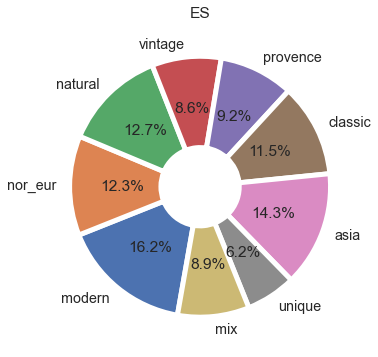

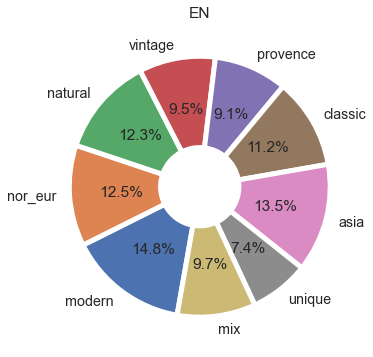

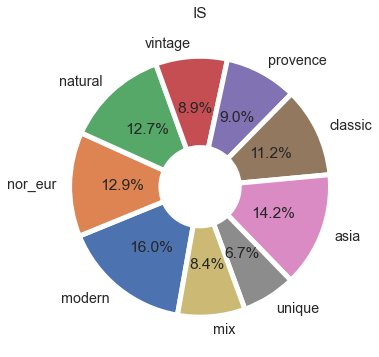

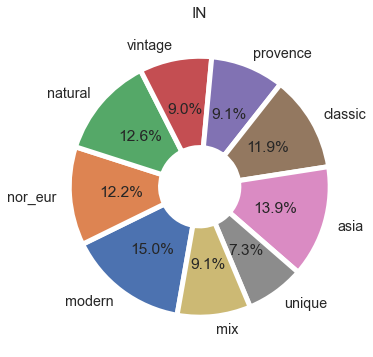

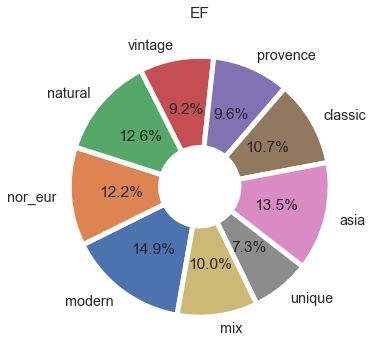

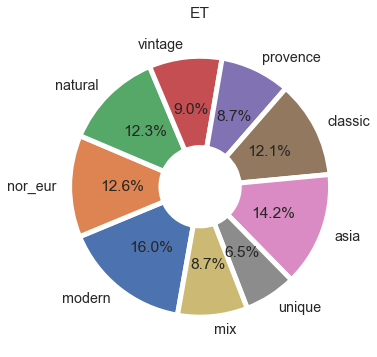

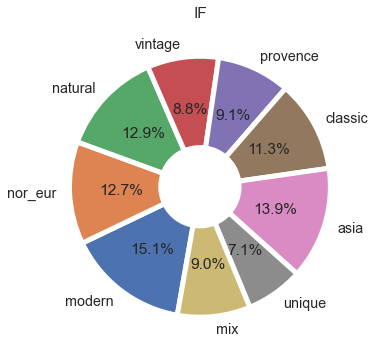

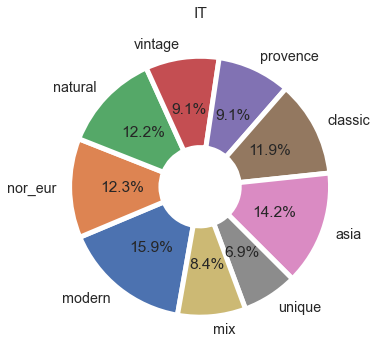

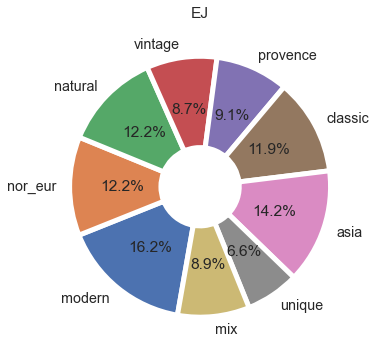

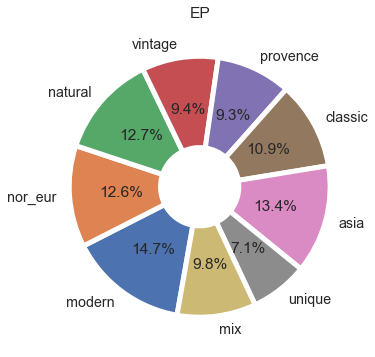

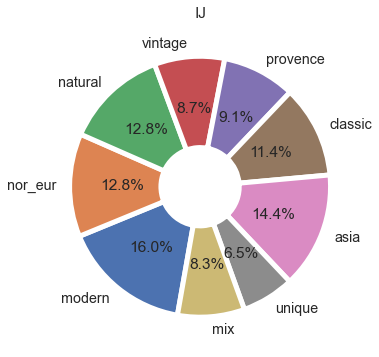

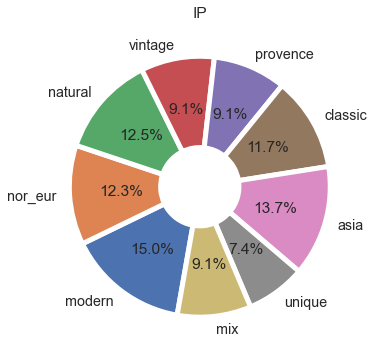

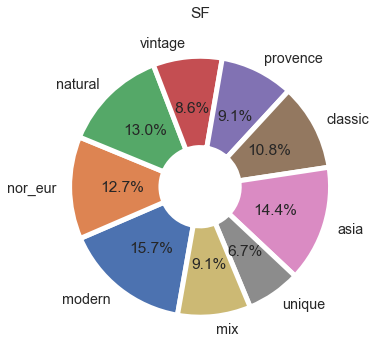

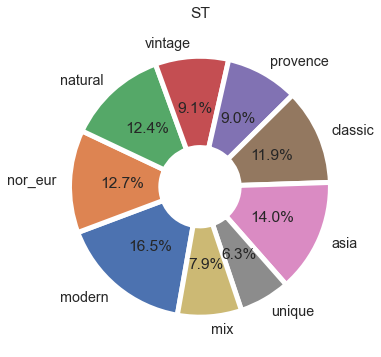

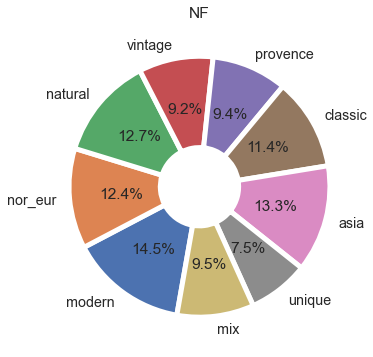

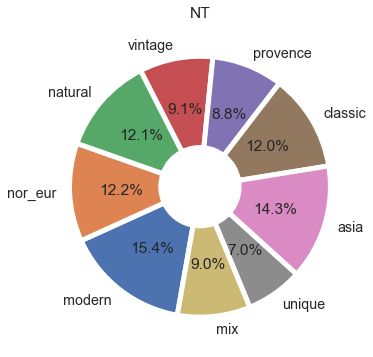

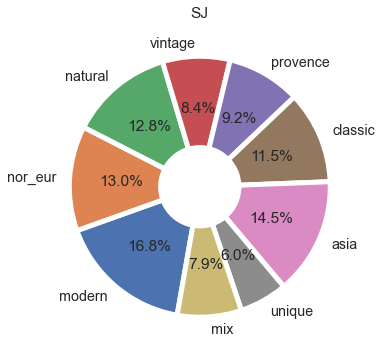

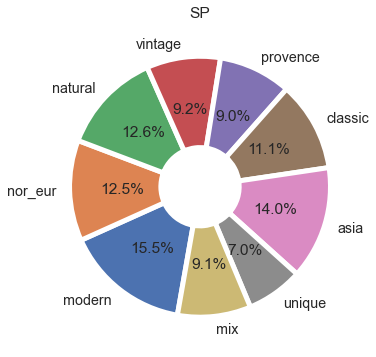

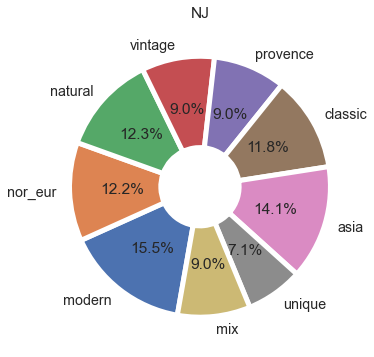

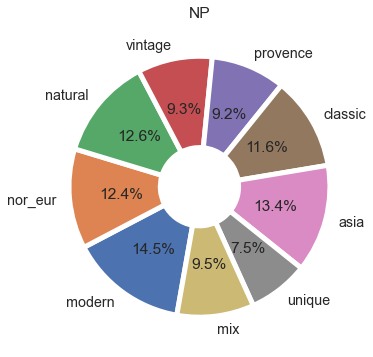

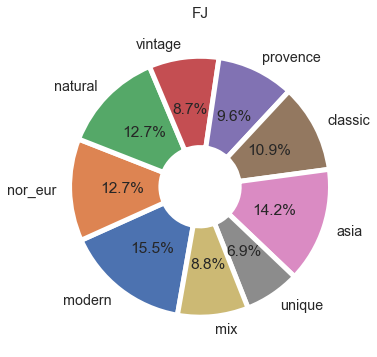

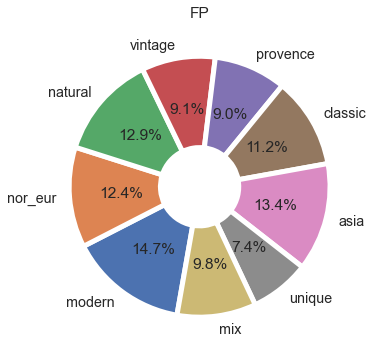

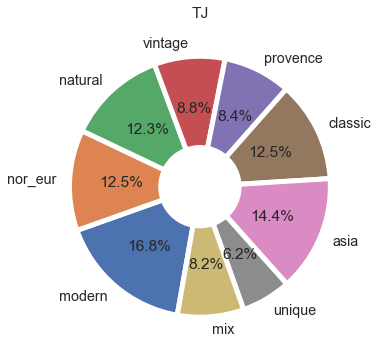

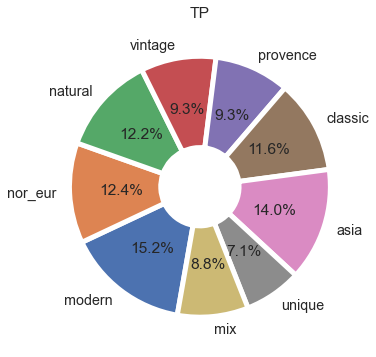

In [30]:
# mbti 컬럼값
mbtis = df.columns

for mbti in mbtis:
    fig = plt.figure(figsize=(18,6))
    sns.set(font_scale=1.3)
    # 비율
    ratio = df[mbti]
    # 이름
    labels = df.index[:]
    plt.title(mbti)
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
    plt.show()

### mbti를 2개로 묶어 봤지만 눈에 띄는 무드가 없다

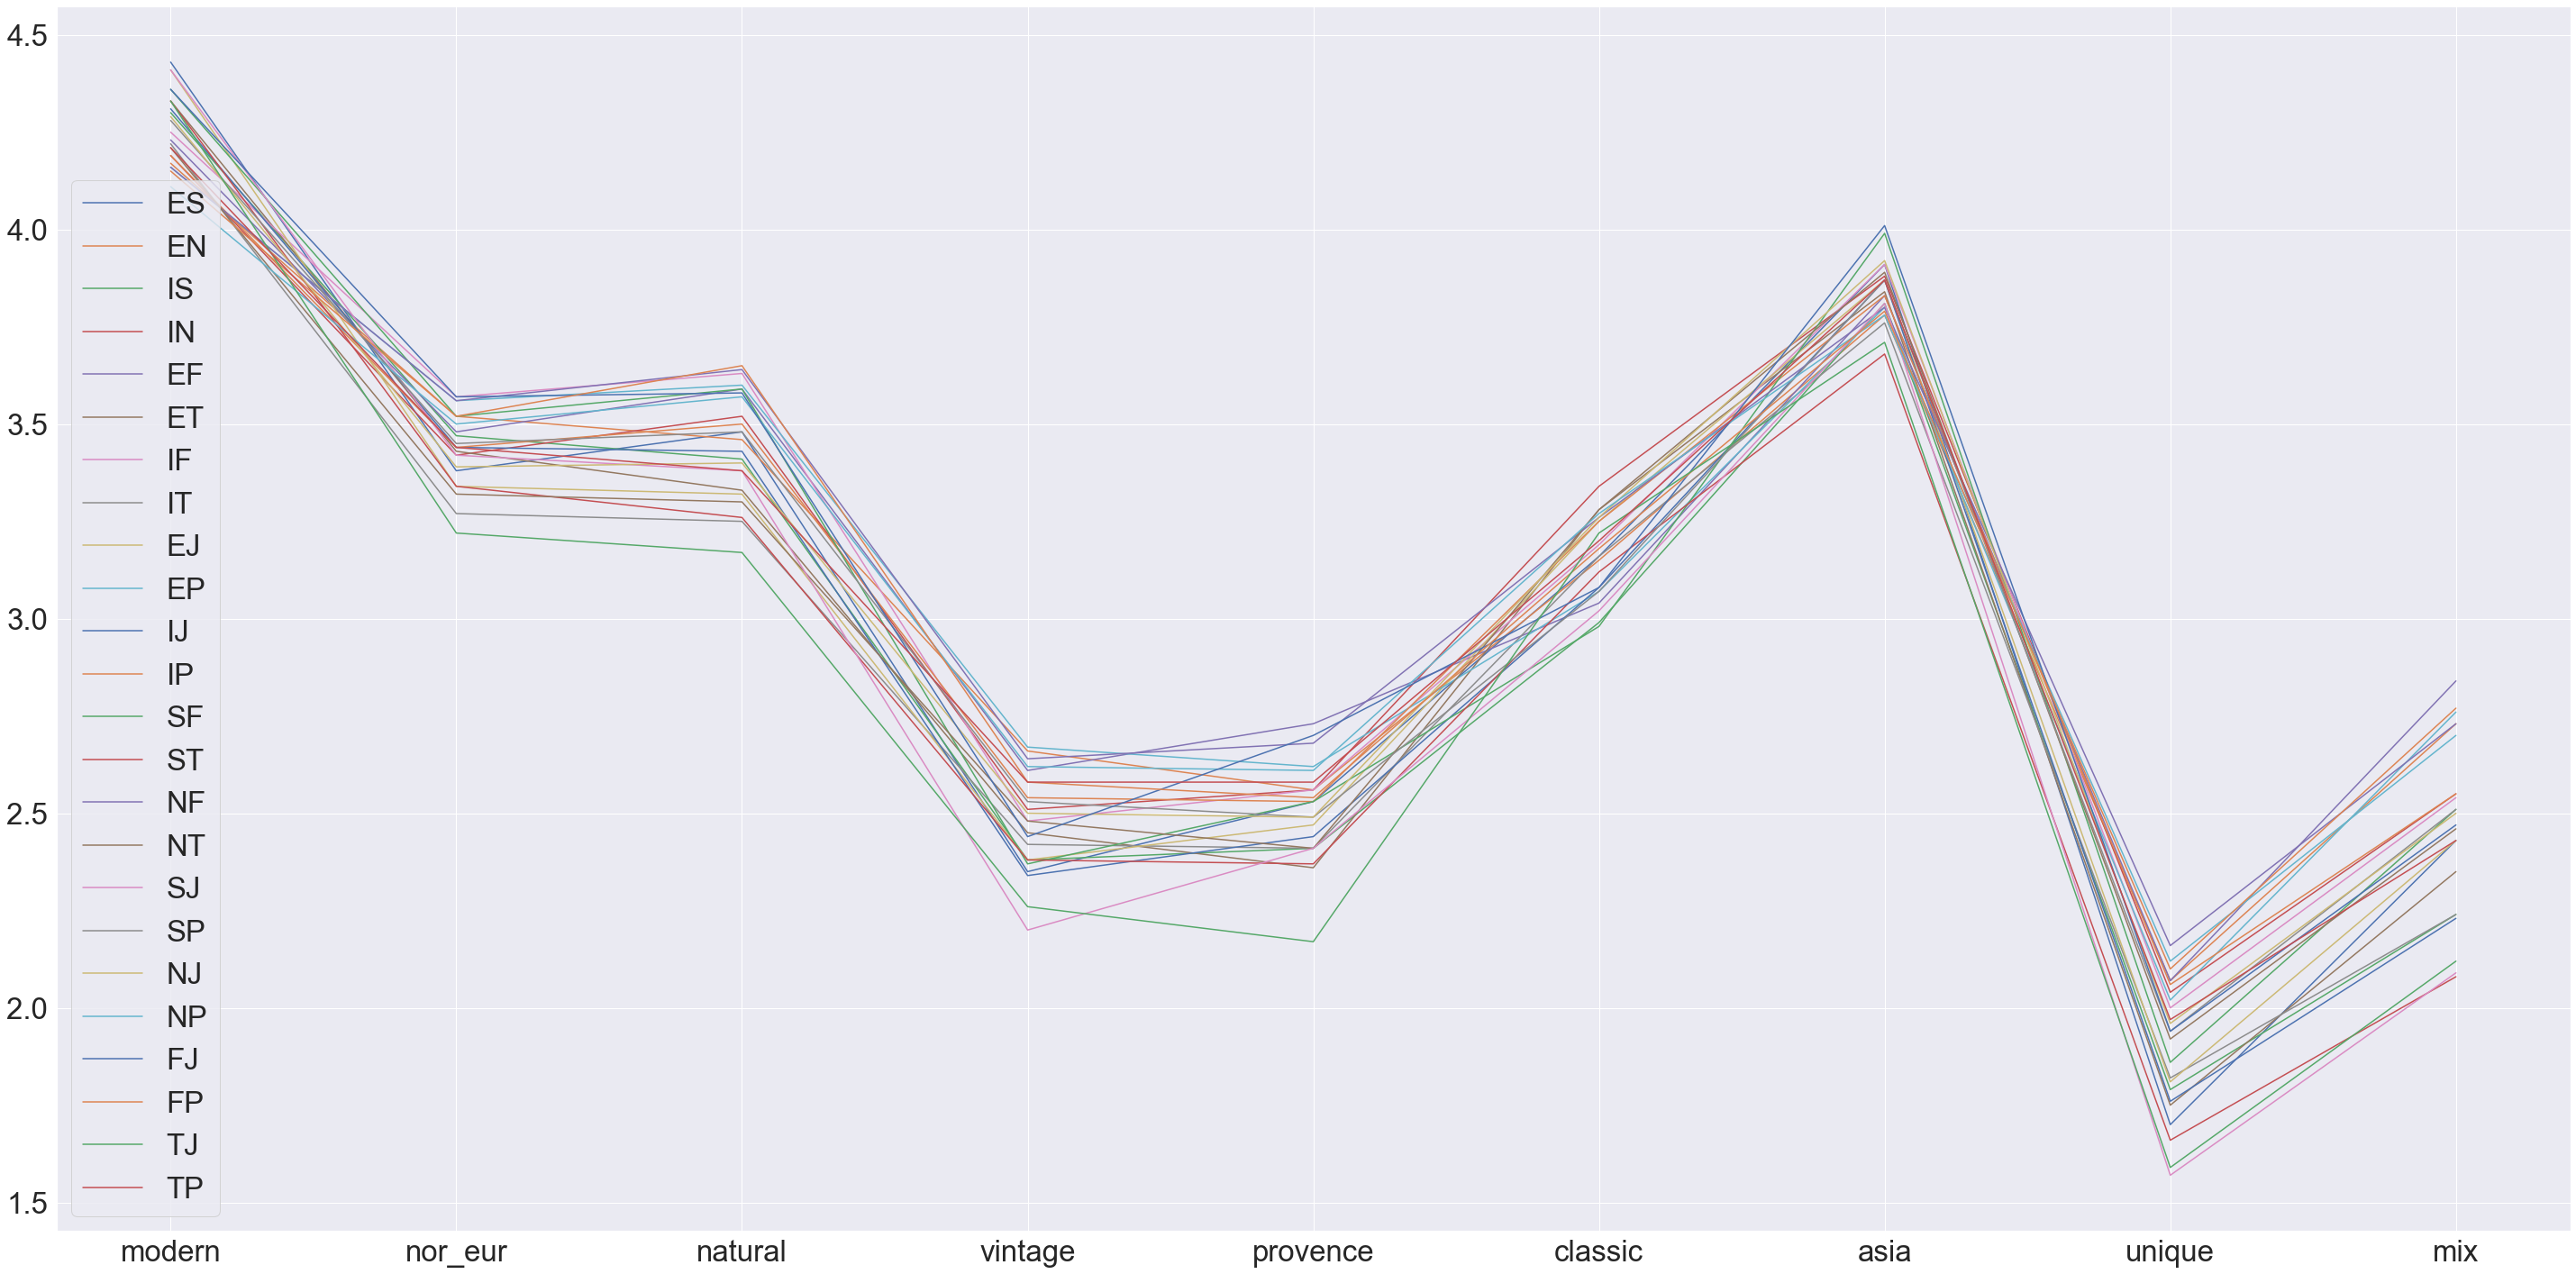

In [31]:
# 각각 무드의 5점과 1점 mbti 그래프
fig = plt.figure(figsize=(50,25))

sns.set(font_scale=3)

for i in personality_2ea:
    plt.plot(df.index,df[i].values, label=i)
    plt.legend(ncol=1)
plt.show()

### mbti 성향 항목 2개 조합별 무드 선호도 평균점수 분석결과
- natural, vintage, provence, unique, mix 차이 많이보임
- 그중에서도 unique, mix 차이⬆️
- 차이가 있는 무드 뽑아보기

In [32]:
df = pd.DataFrame(avg, columns=moods, index=personality_2ea)
df = df[['natural', 'vintage', 'provence', 'unique', 'mix']]

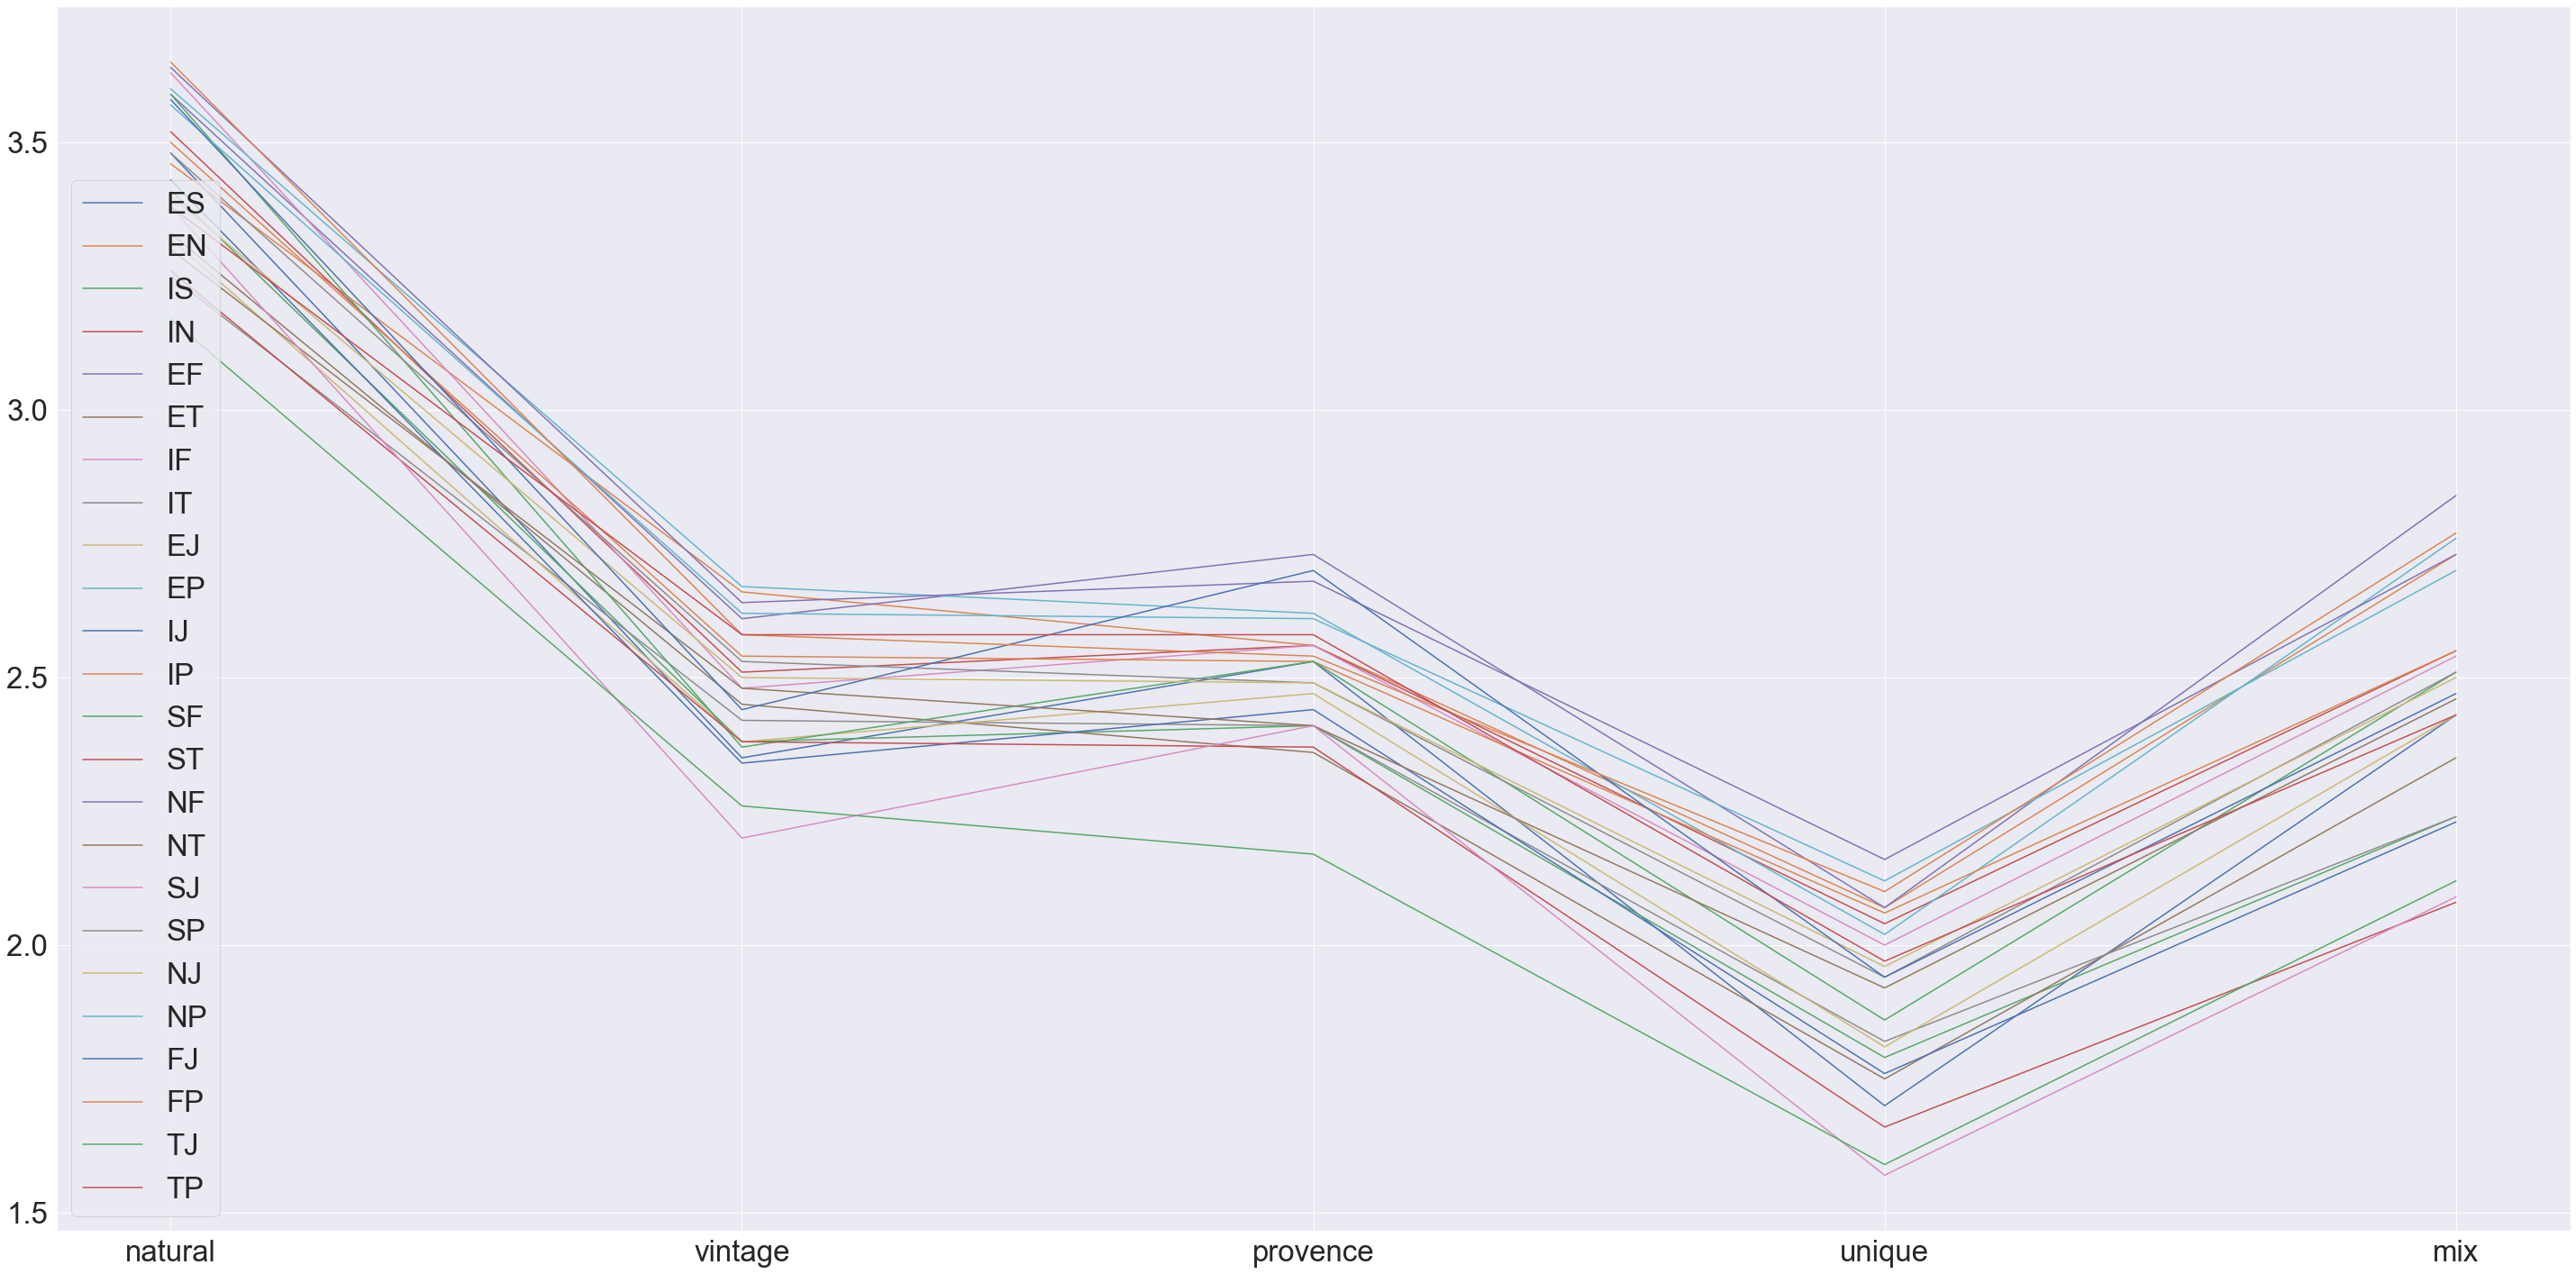

In [33]:
fig = plt.figure(figsize=(50,25))

sns.set(font_scale=3)

for i in personality_2ea:
    plt.plot(df.T.index, df.T[i].values, label=i)
    plt.legend(ncol=1)
plt.show()

In [34]:
max_list = []
min_list = []
for i in df.columns:
    max_list.append(df.index[df[i]==max(df[i])])
    min_list.append(df.index[df[i]==min(df[i])])
print(max_list)
print(min_list)

[Index(['FP'], dtype='object'), Index(['EP'], dtype='object'), Index(['EF'], dtype='object'), Index(['NF'], dtype='object'), Index(['EF'], dtype='object')]
[Index(['TJ'], dtype='object'), Index(['SJ'], dtype='object'), Index(['TJ'], dtype='object'), Index(['SJ'], dtype='object'), Index(['ST'], dtype='object')]


### 분석 결과
- S,T,J 성향의 사람들은 난잡한 것을 싫어하는 경향을 보임
- E,N,F,P 성향의 사람들은 난잡한 것을 좋아하는 경향을 보임

In [35]:
# 전체 무드별 max, min 성향
df = pd.DataFrame(avg, columns=moods, index=personality_2ea)

max_list = []
min_list = []
for i in df.columns:
    max_list.append(df.index[df[i] == max(df[i])])
    min_list.append(df.index[df[i] == min(df[i])])

max_list, min_list

([Index(['ES'], dtype='object'),
  Index(['IF', 'FJ'], dtype='object'),
  Index(['FP'], dtype='object'),
  Index(['EP'], dtype='object'),
  Index(['EF'], dtype='object'),
  Index(['IN'], dtype='object'),
  Index(['FJ'], dtype='object'),
  Index(['NF'], dtype='object'),
  Index(['EF'], dtype='object')],
 [Index(['NP'], dtype='object'),
  Index(['TJ'], dtype='object'),
  Index(['TJ'], dtype='object'),
  Index(['SJ'], dtype='object'),
  Index(['TJ'], dtype='object'),
  Index(['SF'], dtype='object'),
  Index(['ST'], dtype='object'),
  Index(['SJ'], dtype='object'),
  Index(['ST'], dtype='object')])

In [36]:
# 성향별 인테리어 관심도 뽑아보기

In [37]:
# 무드를 라벨링할것인가? 무난 vs 개성
# 각 성향별 블로그, 유튜브댓글 자연어처리해서 => 워드클라우드, most_common(3) => 분류작업 => 
# 인테리어 소품 라벨링?
# 무드를 나누는데 얼마나 어떻게 나눌 것인가?

# mbti별 관심도

In [38]:
df5 = mbti_df['real_mbti'].copy()
df5

0      INTP
1      INFP
2      ISTP
3      INFJ
4      ESTP
       ... 
588    ESTJ
589    INFP
590    ISTP
591    ISTJ
592    ISTP
Name: real_mbti, Length: 593, dtype: object

In [39]:
mbtis = list(set(mbti_df['real_mbti'].values))
mbtis

['ESTP',
 'ENFJ',
 'ENTJ',
 'ESFJ',
 'ENTP',
 'INTP',
 'INFJ',
 'ESFP',
 'ISFP',
 'INFP',
 'ISTP',
 'ISTJ',
 'ENFP',
 'INTJ',
 'ESTJ',
 'ISFJ']

In [40]:
counts = []
for mbti in mbtis:
    print(mbti, df5[mbti_df['real_mbti'] == mbti].shape[0])
    counts.append(df5[mbti_df['real_mbti'] == mbti].shape[0])
counts

ESTP 26
ENFJ 33
ENTJ 23
ESFJ 22
ENTP 31
INTP 49
INFJ 45
ESFP 18
ISFP 55
INFP 72
ISTP 36
ISTJ 41
ENFP 37
INTJ 39
ESTJ 22
ISFJ 44


[26, 33, 23, 22, 31, 49, 45, 18, 55, 72, 36, 41, 37, 39, 22, 44]

In [41]:
mbti_counts = dict(zip(mbtis, counts))
sorted(mbti_counts.items(), key = lambda x: x[1], reverse=True)

[('INFP', 72),
 ('ISFP', 55),
 ('INTP', 49),
 ('INFJ', 45),
 ('ISFJ', 44),
 ('ISTJ', 41),
 ('INTJ', 39),
 ('ENFP', 37),
 ('ISTP', 36),
 ('ENFJ', 33),
 ('ENTP', 31),
 ('ESTP', 26),
 ('ENTJ', 23),
 ('ESFJ', 22),
 ('ESTJ', 22),
 ('ESFP', 18)]

In [42]:
like_avg = []
for mbti in mbtis:
    like_avg.append(round(np.mean(mbti_df['like'][mbti_df['real_mbti'] == mbti].values),2))

mbti_like = zip(counts, like_avg)
mbti = dict(zip(mbtis, mbti_like))
mbti = dict(sorted(mbti.items(), key = lambda x: x[1], reverse=True))
mbti

{'INFP': (72, 3.19),
 'ISFP': (55, 3.15),
 'INTP': (49, 3.04),
 'INFJ': (45, 3.58),
 'ISFJ': (44, 3.3),
 'ISTJ': (41, 3.41),
 'INTJ': (39, 3.26),
 'ENFP': (37, 3.57),
 'ISTP': (36, 2.47),
 'ENFJ': (33, 4.15),
 'ENTP': (31, 3.19),
 'ESTP': (26, 3.38),
 'ENTJ': (23, 3.65),
 'ESFJ': (22, 3.95),
 'ESTJ': (22, 3.5),
 'ESFP': (18, 3.33)}

In [43]:
like = []
for i in range(16):
    like.append(list(mbti.values())[i][1])
like

[3.19,
 3.15,
 3.04,
 3.58,
 3.3,
 3.41,
 3.26,
 3.57,
 2.47,
 4.15,
 3.19,
 3.38,
 3.65,
 3.95,
 3.5,
 3.33]

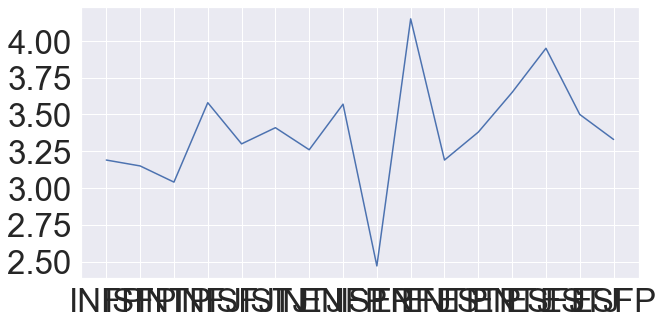

In [44]:
plt.figure(figsize=(10,5))
# sns.set_style('white')
plt.plot(mbti.keys(), like)
sns.set(font_scale=1)
plt.show()

# Keywords

In [45]:
kw = pd.read_csv('./KW.csv', encoding='utf8')
kw

MBTI EI SN FT JP                       KW
0   ESTJ  E  S  T  J       미니멀,내추럴,내추럴,모던,미니멀
1   ISFP  I  S  F  P        미니멀,로맨틱,빈티지,개성,개성
2   INFP  I  N  F  P      빈티지,내추럴,빈티지,로맨틱,로맨틱
3   INFJ  I  N  F  J       미니멀,빈티지,개성,로맨틱,미니멀
4   ISFJ  I  S  F  J       미니멀,모던,미니멀,로맨틱,내추럴
5   ISTJ  I  S  T  J      내추럴,내추럴,미니멀,미니멀,로맨틱
6   ESFJ  E  S  F  J    미니멀, 모던, 로맨틱, 내추럴, 모던
7   ENTJ  E  N  T  J  미니멀, 실용적, 로맨틱, 실용적, 미니멀
8   ESFP  E  S  F  P  로맨틱, 로맨틱, 모던, 미니멀, 로맨틱 
9   ENFP  E  N  F  P     개성, 미니멀, 캐주얼, 모던, 개성
10  ENFJ  E  N  F  J   내추럴, 모던, 로맨틱, 로맨틱, 캐주얼
11  ENTP  E  N  T  P     개성, 캐주얼, 캐주얼, 개성, 개성
12  INTP  I  N  T  P    실용적, 미니멀, 개성, 모던, 미니멀
13  INTJ  I  N  T  J   미니멀, 모던, 실용적, 빈티지, 캐주얼
14  ISTP  I  S  T  P  미니멀, 미니멀, 로맨틱, 빈티지, 실용적
15  ESTP  E  S  T  P   미니멀, 미니멀, 로맨틱, 캐주얼, 개성

In [46]:
kw['KW1'] = None
kw['KW2'] = None
kw['KW3'] = None
kw['KW4'] = None
kw['KW5'] = None
kw

MBTI EI SN FT JP                       KW   KW1   KW2   KW3   KW4   KW5
0   ESTJ  E  S  T  J       미니멀,내추럴,내추럴,모던,미니멀  None  None  None  None  None
1   ISFP  I  S  F  P        미니멀,로맨틱,빈티지,개성,개성  None  None  None  None  None
2   INFP  I  N  F  P      빈티지,내추럴,빈티지,로맨틱,로맨틱  None  None  None  None  None
3   INFJ  I  N  F  J       미니멀,빈티지,개성,로맨틱,미니멀  None  None  None  None  None
4   ISFJ  I  S  F  J       미니멀,모던,미니멀,로맨틱,내추럴  None  None  None  None  None
5   ISTJ  I  S  T  J      내추럴,내추럴,미니멀,미니멀,로맨틱  None  None  None  None  None
6   ESFJ  E  S  F  J    미니멀, 모던, 로맨틱, 내추럴, 모던  None  None  None  None  None
7   ENTJ  E  N  T  J  미니멀, 실용적, 로맨틱, 실용적, 미니멀  None  None  None  None  None
8   ESFP  E  S  F  P  로맨틱, 로맨틱, 모던, 미니멀, 로맨틱   None  None  None  None  None
9   ENFP  E  N  F  P     개성, 미니멀, 캐주얼, 모던, 개성  None  None  None  None  None
10  ENFJ  E  N  F  J   내추럴, 모던, 로맨틱, 로맨틱, 캐주얼  None  None  None  None  None
11  ENTP  E  N  T  P     개성, 캐주얼, 캐주얼, 개성, 개성  None  None  None  None  None
12  INTP  I  N  T  P    실용적, 미니멀, 개성, 모던, 미니멀  None  None  None  None  None
13  INTJ  I  N  T  J   미니멀, 모던, 실용적, 빈티지, 캐주얼  None  None  None  None  None
14  ISTP  I  S  T  P  미니멀, 미니멀, 로맨틱, 빈티지, 실용적  None  None  None  None  None
15  ESTP  E  S  T  P   미니멀, 미니멀, 로맨틱, 캐주얼, 개성  None  None  None  None  None

In [47]:
for i in range(0,16):
    kw1 = kw['KW'][i].split(',')
    kw['KW1'][i] = kw1[0].strip()
    kw['KW2'][i] = kw1[1].strip()
    kw['KW3'][i] = kw1[2].strip()
    kw['KW4'][i] = kw1[3].strip()
    kw['KW5'][i] = kw1[4].strip()
kw

MBTI EI SN FT JP                       KW  KW1  KW2  KW3  KW4  KW5
0   ESTJ  E  S  T  J       미니멀,내추럴,내추럴,모던,미니멀  미니멀  내추럴  내추럴   모던  미니멀
1   ISFP  I  S  F  P        미니멀,로맨틱,빈티지,개성,개성  미니멀  로맨틱  빈티지   개성   개성
2   INFP  I  N  F  P      빈티지,내추럴,빈티지,로맨틱,로맨틱  빈티지  내추럴  빈티지  로맨틱  로맨틱
3   INFJ  I  N  F  J       미니멀,빈티지,개성,로맨틱,미니멀  미니멀  빈티지   개성  로맨틱  미니멀
4   ISFJ  I  S  F  J       미니멀,모던,미니멀,로맨틱,내추럴  미니멀   모던  미니멀  로맨틱  내추럴
5   ISTJ  I  S  T  J      내추럴,내추럴,미니멀,미니멀,로맨틱  내추럴  내추럴  미니멀  미니멀  로맨틱
6   ESFJ  E  S  F  J    미니멀, 모던, 로맨틱, 내추럴, 모던  미니멀   모던  로맨틱  내추럴   모던
7   ENTJ  E  N  T  J  미니멀, 실용적, 로맨틱, 실용적, 미니멀  미니멀  실용적  로맨틱  실용적  미니멀
8   ESFP  E  S  F  P  로맨틱, 로맨틱, 모던, 미니멀, 로맨틱   로맨틱  로맨틱   모던  미니멀  로맨틱
9   ENFP  E  N  F  P     개성, 미니멀, 캐주얼, 모던, 개성   개성  미니멀  캐주얼   모던   개성
10  ENFJ  E  N  F  J   내추럴, 모던, 로맨틱, 로맨틱, 캐주얼  내추럴   모던  로맨틱  로맨틱  캐주얼
11  ENTP  E  N  T  P     개성, 캐주얼, 캐주얼, 개성, 개성   개성  캐주얼  캐주얼   개성   개성
12  INTP  I  N  T  P    실용적, 미니멀, 개성, 모던, 미니멀  실용적  미니멀   개성   모던  미니멀
13  INTJ  I  N  T  J   미니멀, 모던, 실용적, 빈티지, 캐주얼  미니멀   모던  실용적  빈티지  캐주얼
14  ISTP  I  S  T  P  미니멀, 미니멀, 로맨틱, 빈티지, 실용적  미니멀  미니멀  로맨틱  빈티지  실용적
15  ESTP  E  S  T  P   미니멀, 미니멀, 로맨틱, 캐주얼, 개성  미니멀  미니멀  로맨틱  캐주얼   개성

In [48]:
moods = kw.iloc[:,6:]
mood = []
for i in range(len(moods.values)):
    for j in moods.values[i]:
        mood.append(j)
moodtype = set(mood)
moodtype

{'개성', '내추럴', '로맨틱', '모던', '미니멀', '빈티지', '실용적', '캐주얼'}

## 로맨틱, 캐주얼, 빈티지

In [49]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '로맨틱' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
romantics = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    romantics.append(value_count)

romantics2 = []
for i in romantics:
    romantics2.append(round(i/sum(romantics),2))

romantic = dict(zip(mbti, romantics2))
romantic = dict(sorted(romantic.items(), key = lambda x: x[1], reverse=True))
romantic = pd.DataFrame(romantic, index=['romantic'], columns=mbti)
romantic

N     S     I     T     J     E     F     P
romantic  0.1  0.15  0.12  0.07  0.12  0.13  0.18  0.13

In [50]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '캐주얼' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
casuals = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    casuals.append(value_count)

casuals2 = []
for i in casuals:
    casuals2.append(round(i/sum(casuals),2))

casual = dict(zip(mbti, casuals2))
casual = dict(sorted(casual.items(), key = lambda x: x[1], reverse=True))
casual = pd.DataFrame(casual, index=['casual'], columns=mbti)
casual

N     T     I     S     J     E     F     P
casual  0.21  0.17  0.04  0.04  0.08  0.21  0.08  0.17

In [51]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '빈티지' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
vintages = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    vintages.append(value_count)

vintages2 = []
for i in vintages:
    vintages2.append(round(i/sum(vintages),2))

vintage = dict(zip(mbti, vintages2))
vintage = dict(sorted(vintage.items(), key = lambda x: x[1], reverse=True))
vintage = pd.DataFrame(vintage, index=['vintage'], columns=mbti)
vintage

N     S     I     T     J     F     P
vintage  0.17  0.08  0.25  0.08  0.08  0.17  0.17

In [52]:
mood1 = pd.concat([romantic, casual, vintage])
mood1 = mood1.fillna(0)
mood1

N     S     I     T     J     E     F     P
romantic  0.10  0.15  0.12  0.07  0.12  0.13  0.18  0.13
casual    0.21  0.04  0.04  0.17  0.08  0.21  0.08  0.17
vintage   0.17  0.08  0.25  0.08  0.08  0.00  0.17  0.17

In [53]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '미니멀' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
minimal = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    minimal.append(value_count)

minimal2 = []
for i in minimal:
    minimal2.append(round(i/sum(minimal),2))

minimal = dict(zip(mbti, minimal2))
minimal = dict(sorted(minimal.items(), key = lambda x: x[1], reverse=True))
minimal = pd.DataFrame(minimal, index=['minimal'], columns=mbti)
minimal

N     S     I     T     J     E    F     P
minimal  0.1  0.15  0.14  0.15  0.14  0.11  0.1  0.11

In [54]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '모던' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
moderns = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    moderns.append(value_count)

moderns2 = []
for i in moderns:
      moderns2.append(round(i/sum(moderns),2))

modern = dict(zip(mbti, moderns2))
modern = dict(sorted(modern.items(), key = lambda x: x[1], reverse=True))
modern = pd.DataFrame(modern, index=['modern'], columns=mbti)
modern

N     S     I     T     J     E     F     P
modern  0.11  0.14  0.08  0.08  0.17  0.17  0.17  0.08

In [55]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '내추럴' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
naturals = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    naturals.append(value_count)

naturals2 = []
for i in naturals:
    naturals2.append(round(i/sum(naturals),2))

natural = dict(zip(mbti, naturals2))
natural = dict(sorted(natural.items(), key = lambda x: x[1], reverse=True))
natural = pd.DataFrame(natural, index=['natural'], columns=mbti)
natural

N     S     I     T     J     E     F     P
natural  0.06  0.19  0.12  0.12  0.22  0.12  0.12  0.03

In [56]:
mood2 = pd.concat([minimal, modern, natural])
mood2

N     S     I     T     J     E     F     P
minimal  0.10  0.15  0.14  0.15  0.14  0.11  0.10  0.11
modern   0.11  0.14  0.08  0.08  0.17  0.17  0.17  0.08
natural  0.06  0.19  0.12  0.12  0.22  0.12  0.12  0.03

In [57]:
mood3 = pd.concat([mood2, mood1])
mood3

N     S     I     T     J     E     F     P
minimal   0.10  0.15  0.14  0.15  0.14  0.11  0.10  0.11
modern    0.11  0.14  0.08  0.08  0.17  0.17  0.17  0.08
natural   0.06  0.19  0.12  0.12  0.22  0.12  0.12  0.03
romantic  0.10  0.15  0.12  0.07  0.12  0.13  0.18  0.13
casual    0.21  0.04  0.04  0.17  0.08  0.21  0.08  0.17
vintage   0.17  0.08  0.25  0.08  0.08  0.00  0.17  0.17

In [58]:
cols = kw.iloc[:,6:]
count = []

for i in range(0,16):
    for n in range(0,5):
        if '실용적' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
useful = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    useful.append(value_count)

useful2 = []
for i in useful:
    useful2.append(round(i/sum(useful),2))

useful = dict(zip(mbti, useful2))
useful = dict(sorted(useful.items(), key = lambda x: x[1], reverse=True))

usefuls = pd.DataFrame(useful, index=['useful'], columns=mbti)
usefuls

N     T     I     S     J    E    P
useful  0.2  0.25  0.15  0.05  0.15  0.1  0.1

In [59]:
cols = kw.iloc[:,6:]
count = []

for i in range(0,16):
    for n in range(0,5):
        if '개성' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
individuality = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    individuality.append(value_count)

individuality2 = []
for i in individuality:
    individuality2.append(round(i/sum(individuality),2))

individuality = dict(zip(mbti, individuality2))
individuality = dict(sorted(individuality.items(), key = lambda x: x[1], reverse=True))

indi = pd.DataFrame(individuality, index=['individuality'], columns=mbti)
indi

N     S    I     T     J     E     F     P
individuality  0.17  0.07  0.1  0.12  0.03  0.15  0.12  0.23

In [60]:
mood = pd.concat([mood3, indi, usefuls])
mood = mood.fillna(0)
mood

N     S     I     T     J     E     F     P
minimal        0.10  0.15  0.14  0.15  0.14  0.11  0.10  0.11
modern         0.11  0.14  0.08  0.08  0.17  0.17  0.17  0.08
natural        0.06  0.19  0.12  0.12  0.22  0.12  0.12  0.03
romantic       0.10  0.15  0.12  0.07  0.12  0.13  0.18  0.13
casual         0.21  0.04  0.04  0.17  0.08  0.21  0.08  0.17
vintage        0.17  0.08  0.25  0.08  0.08  0.00  0.17  0.17
individuality  0.17  0.07  0.10  0.12  0.03  0.15  0.12  0.23
useful         0.20  0.05  0.15  0.25  0.15  0.10  0.00  0.10

In [61]:
mbti_list = list(set(mbti_df['real_mbti'].values))
mbti_list

['ESTP',
 'ENFJ',
 'ENTJ',
 'ESFJ',
 'ENTP',
 'INTP',
 'INFJ',
 'ESFP',
 'ISFP',
 'INFP',
 'ISTP',
 'ISTJ',
 'ENFP',
 'INTJ',
 'ESTJ',
 'ISFJ']

In [62]:
score = []
for i in mbti_list:
    i = mood[[i[0], i[1], i[2], i[3]]]
    score.append(i)
    
score

[                  E     S     T     P
 minimal        0.11  0.15  0.15  0.11
 modern         0.17  0.14  0.08  0.08
 natural        0.12  0.19  0.12  0.03
 romantic       0.13  0.15  0.07  0.13
 casual         0.21  0.04  0.17  0.17
 vintage        0.00  0.08  0.08  0.17
 individuality  0.15  0.07  0.12  0.23
 useful         0.10  0.05  0.25  0.10,
                   E     N     F     J
 minimal        0.11  0.10  0.10  0.14
 modern         0.17  0.11  0.17  0.17
 natural        0.12  0.06  0.12  0.22
 romantic       0.13  0.10  0.18  0.12
 casual         0.21  0.21  0.08  0.08
 vintage        0.00  0.17  0.17  0.08
 individuality  0.15  0.17  0.12  0.03
 useful         0.10  0.20  0.00  0.15,
                   E     N     T     J
 minimal        0.11  0.10  0.15  0.14
 modern         0.17  0.11  0.08  0.17
 natural        0.12  0.06  0.12  0.22
 romantic       0.13  0.10  0.07  0.12
 casual         0.21  0.21  0.17  0.08
 vintage        0.00  0.17  0.08  0.08
 individuality  0.15  0

In [63]:
weights = []
for i in score:
    for j in range(8):
#         print(i.iloc[j])
        weights.append(sum(i.iloc[j].values))
    i['score'] = weights
#     print(weights)
    weights=[]
#     print(weights)
    
score

[                  E     S     T     P  score
 minimal        0.11  0.15  0.15  0.11   0.52
 modern         0.17  0.14  0.08  0.08   0.47
 natural        0.12  0.19  0.12  0.03   0.46
 romantic       0.13  0.15  0.07  0.13   0.48
 casual         0.21  0.04  0.17  0.17   0.59
 vintage        0.00  0.08  0.08  0.17   0.33
 individuality  0.15  0.07  0.12  0.23   0.57
 useful         0.10  0.05  0.25  0.10   0.50,
                   E     N     F     J  score
 minimal        0.11  0.10  0.10  0.14   0.45
 modern         0.17  0.11  0.17  0.17   0.62
 natural        0.12  0.06  0.12  0.22   0.52
 romantic       0.13  0.10  0.18  0.12   0.53
 casual         0.21  0.21  0.08  0.08   0.58
 vintage        0.00  0.17  0.17  0.08   0.42
 individuality  0.15  0.17  0.12  0.03   0.47
 useful         0.10  0.20  0.00  0.15   0.45,
                   E     N     T     J  score
 minimal        0.11  0.10  0.15  0.14   0.50
 modern         0.17  0.11  0.08  0.17   0.53
 natural        0.12  0.06  0.12

In [64]:
# rows => mbti 16개
# columns => mood 8개

## 가중치
# 1등: 1.5
# 2등: 1.4
# 3등: 1.3
# 4등: 1.2
# 5등: 1.1
# 나머지: 1
# 중복일 경우, n번중복시 등수 가중치에 0.1^(n-1)

In [65]:
mbti_list

['ESTP',
 'ENFJ',
 'ENTJ',
 'ESFJ',
 'ENTP',
 'INTP',
 'INFJ',
 'ESFP',
 'ISFP',
 'INFP',
 'ISTP',
 'ISTJ',
 'ENFP',
 'INTJ',
 'ESTJ',
 'ISFJ']

In [66]:
scores=[]
for i in range(16):
    scores.append(score[i]['score'])
scores = pd.concat(scores, axis=1).T
scores.index=mbti_list
scores = scores.sort_index()
scores

minimal  modern  natural  romantic  casual  vintage  individuality  \
ENFJ     0.45    0.62     0.52      0.53    0.58     0.42           0.47   
ENFP     0.42    0.53     0.33      0.54    0.67     0.51           0.67   
ENTJ     0.50    0.53     0.52      0.42    0.67     0.33           0.47   
ENTP     0.47    0.44     0.33      0.43    0.76     0.42           0.67   
ESFJ     0.50    0.65     0.65      0.58    0.41     0.33           0.37   
ESFP     0.47    0.56     0.46      0.59    0.50     0.42           0.57   
ESTJ     0.55    0.56     0.65      0.47    0.50     0.24           0.37   
ESTP     0.52    0.47     0.46      0.48    0.59     0.33           0.57   
INFJ     0.48    0.53     0.52      0.52    0.41     0.67           0.42   
INFP     0.45    0.44     0.33      0.53    0.50     0.76           0.62   
INTJ     0.53    0.44     0.52      0.41    0.50     0.58           0.42   
INTP     0.50    0.35     0.33      0.42    0.59     0.67           0.62   
ISFJ     0.53    0.56     0.65      0.57    0.24     0.58           0.32   
ISFP     0.50    0.47     0.46      0.58    0.33     0.67           0.52   
ISTJ     0.58    0.47     0.65      0.46    0.33     0.49           0.32   
ISTP     0.55    0.38     0.46      0.47    0.42     0.58           0.52   

      useful  
ENFJ    0.45  
ENFP    0.40  
ENTJ    0.70  
ENTP    0.65  
ESFJ    0.30  
ESFP    0.25  
ESTJ    0.55  
ESTP    0.50  
INFJ    0.50  
INFP    0.45  
INTJ    0.75  
INTP    0.70  
ISFJ    0.35  
ISFP    0.30  
ISTJ    0.60  
ISTP    0.55

In [67]:
weights = pd.read_csv('2번_weights.csv', index_col=0)
weights.fillna(1, inplace=True)
weights = weights.sort_index()
weights

minimal  modern  natural  romantic  casual  vintage  individuality  \
MBTI                                                                       
ENFJ    1.000    1.40     1.50     1.420    1.10     1.00          1.000   
ENFP    1.400    1.20     1.00     1.000    1.30     1.00          1.610   
ENTJ    1.610    1.00     1.00     1.300    1.00     1.00          1.000   
ENTP    1.000    1.00     1.00     1.000    1.53     1.00          1.631   
ESFJ    1.500    1.51     1.20     1.300    1.00     1.00          1.000   
ESFP    1.200    1.30     1.00     1.651    1.00     1.00          1.000   
ESTJ    1.610    1.20     1.53     1.000    1.00     1.00          1.000   
ESTP    1.640    1.00     1.00     1.300    1.20     1.00          1.100   
INFJ    1.610    1.00     1.00     1.200    1.00     1.40          1.300   
INFP    1.000    1.00     1.40     1.310    1.00     1.63          1.000   
INTJ    1.500    1.40     1.00     1.000    1.10     1.20          1.000   
INTP    1.510    1.20     1.00     1.000    1.00     1.00          1.300   
ISFJ    1.642    1.40     1.00     1.100    1.00     1.00          1.000   
ISFP    1.500    1.00     1.00     1.400    1.00     1.30          1.310   
ISTJ    1.420    1.00     1.64     1.100    1.00     1.00          1.000   
ISTP    1.640    1.00     1.00     1.300    1.00     1.20          1.000   

      useful  
MBTI          
ENFJ    1.00  
ENFP    1.00  
ENTJ    1.52  
ENTP    1.00  
ESFJ    1.00  
ESFP    1.00  
ESTJ    1.00  
ESTP    1.00  
INFJ    1.00  
INFP    1.00  
INTJ    1.30  
INTP    1.50  
ISFJ    1.00  
ISFP    1.00  
ISTJ    1.00  
ISTP    1.10

In [68]:
weight = scores*weights
weight

minimal  modern  natural  romantic  casual  vintage  individuality  \
ENFJ  0.45000  0.8680   0.7800   0.75260  0.6380   0.4200        0.47000   
ENFP  0.58800  0.6360   0.3300   0.54000  0.8710   0.5100        1.07870   
ENTJ  0.80500  0.5300   0.5200   0.54600  0.6700   0.3300        0.47000   
ENTP  0.47000  0.4400   0.3300   0.43000  1.1628   0.4200        1.09277   
ESFJ  0.75000  0.9815   0.7800   0.75400  0.4100   0.3300        0.37000   
ESFP  0.56400  0.7280   0.4600   0.97409  0.5000   0.4200        0.57000   
ESTJ  0.88550  0.6720   0.9945   0.47000  0.5000   0.2400        0.37000   
ESTP  0.85280  0.4700   0.4600   0.62400  0.7080   0.3300        0.62700   
INFJ  0.77280  0.5300   0.5200   0.62400  0.4100   0.9380        0.54600   
INFP  0.45000  0.4400   0.4620   0.69430  0.5000   1.2388        0.62000   
INTJ  0.79500  0.6160   0.5200   0.41000  0.5500   0.6960        0.42000   
INTP  0.75500  0.4200   0.3300   0.42000  0.5900   0.6700        0.80600   
ISFJ  0.87026  0.7840   0.6500   0.62700  0.2400   0.5800        0.32000   
ISFP  0.75000  0.4700   0.4600   0.81200  0.3300   0.8710        0.68120   
ISTJ  0.82360  0.4700   1.0660   0.50600  0.3300   0.4900        0.32000   
ISTP  0.90200  0.3800   0.4600   0.61100  0.4200   0.6960        0.52000   

      useful  
ENFJ   0.450  
ENFP   0.400  
ENTJ   1.064  
ENTP   0.650  
ESFJ   0.300  
ESFP   0.250  
ESTJ   0.550  
ESTP   0.500  
INFJ   0.500  
INFP   0.450  
INTJ   0.975  
INTP   1.050  
ISFJ   0.350  
ISFP   0.300  
ISTJ   0.600  
ISTP   0.605

In [80]:
personal1 = pd.concat([mbti_df.iloc[:, 3:12], mbti_df.real_mbti], axis=1)
personal = personal1.copy()
del(personal['modern'])
del(personal['natural'])
del(personal['vintage'])
personal

nor_eur  provence  classic  asia  unique  mix real_mbti
0          3         4        3     5       2    3      INTP
1          4         1        2     3       1    4      INFP
2          4         1        1     3       1    4      ISTP
3          3         1        1     5       1    2      INFJ
4          3         2        1     4       1    2      ESTP
..       ...       ...      ...   ...     ...  ...       ...
588        4         2        4     3       4    4      ESTJ
589        4         4        5     3       5    4      INFP
590        4         2        4     3       1    2      ISTP
591        2         1        3     2       1    1      ISTJ
592        3         5        4     5       3    2      ISTP

[593 rows x 7 columns]

In [81]:
personal['minimal'] = (personal1['modern'] + personal1['asia']) / 2
personal['modern'] = personal1['modern']
personal['natural'] = personal1['natural']
personal['romantic'] = (personal1['provence'] + personal1['natural'])/2
personal['casual'] = (personal1['nor_eur'] + personal1['mix'])/2
personal['vintage'] = (personal1['vintage'] + personal1['classic']) / 2
personal['individuality'] = (personal1['unique'] + personal1['mix']) / 2
personal['useful'] = (personal1['modern'] + personal1['nor_eur']) / 2

personal = personal.iloc[:, 6:]
# personal = personal.iloc[574-593:, :]
personal

real_mbti  minimal  modern  natural  romantic  casual  vintage  \
0        INTP      5.0       5        3       3.5     3.0      3.0   
1        INFP      4.0       5        3       2.0     4.0      1.5   
2        ISTP      4.0       5        3       2.0     4.0      1.0   
3        INFJ      5.0       5        4       2.5     2.5      1.0   
4        ESTP      4.5       5        4       3.0     2.5      1.0   
..        ...      ...     ...      ...       ...     ...      ...   
588      ESTJ      3.0       3        2       2.0     4.0      3.0   
589      INFP      3.5       4        4       4.0     4.0      4.0   
590      ISTP      4.0       5        4       3.0     3.0      3.0   
591      ISTJ      3.0       4        1       1.0     1.5      2.0   
592      ISTP      5.0       5        5       5.0     2.5      4.0   

     individuality  useful  
0              2.5     4.0  
1              2.5     4.5  
2              2.5     4.5  
3              1.5     4.0  
4              1.5     4.0  
..             ...     ...  
588            4.0     3.5  
589            4.5     4.0  
590            1.5     4.5  
591            1.0     3.0  
592            2.5     4.0  

[593 rows x 9 columns]

In [82]:
personal.set_index('real_mbti', inplace=True)
personal

minimal  modern  natural  romantic  casual  vintage  individuality  \
real_mbti                                                                       
INTP           5.0       5        3       3.5     3.0      3.0            2.5   
INFP           4.0       5        3       2.0     4.0      1.5            2.5   
ISTP           4.0       5        3       2.0     4.0      1.0            2.5   
INFJ           5.0       5        4       2.5     2.5      1.0            1.5   
ESTP           4.5       5        4       3.0     2.5      1.0            1.5   
...            ...     ...      ...       ...     ...      ...            ...   
ESTJ           3.0       3        2       2.0     4.0      3.0            4.0   
INFP           3.5       4        4       4.0     4.0      4.0            4.5   
ISTP           4.0       5        4       3.0     3.0      3.0            1.5   
ISTJ           3.0       4        1       1.0     1.5      2.0            1.0   
ISTP           5.0       5        5       5.0     2.5      4.0            2.5   

           useful  
real_mbti          
INTP          4.0  
INFP          4.5  
ISTP          4.5  
INFJ          4.0  
ESTP          4.0  
...           ...  
ESTJ          3.5  
INFP          4.0  
ISTP          4.5  
ISTJ          3.0  
ISTP          4.0  

[593 rows x 8 columns]

In [83]:
personal.to_csv('personalraw.csv')

In [84]:
personal = np.log(personal)
personal

minimal    modern   natural  romantic    casual   vintage  \
real_mbti                                                               
INTP       1.609438  1.609438  1.098612  1.252763  1.098612  1.098612   
INFP       1.386294  1.609438  1.098612  0.693147  1.386294  0.405465   
ISTP       1.386294  1.609438  1.098612  0.693147  1.386294  0.000000   
INFJ       1.609438  1.609438  1.386294  0.916291  0.916291  0.000000   
ESTP       1.504077  1.609438  1.386294  1.098612  0.916291  0.000000   
...             ...       ...       ...       ...       ...       ...   
ESTJ       1.098612  1.098612  0.693147  0.693147  1.386294  1.098612   
INFP       1.252763  1.386294  1.386294  1.386294  1.386294  1.386294   
ISTP       1.386294  1.609438  1.386294  1.098612  1.098612  1.098612   
ISTJ       1.098612  1.386294  0.000000  0.000000  0.405465  0.693147   
ISTP       1.609438  1.609438  1.609438  1.609438  0.916291  1.386294   

           individuality    useful  
real_mbti                           
INTP            0.916291  1.386294  
INFP            0.916291  1.504077  
ISTP            0.916291  1.504077  
INFJ            0.405465  1.386294  
ESTP            0.405465  1.386294  
...                  ...       ...  
ESTJ            1.386294  1.252763  
INFP            1.504077  1.386294  
ISTP            0.405465  1.504077  
ISTJ            0.000000  1.098612  
ISTP            0.916291  1.386294  

[593 rows x 8 columns]

In [85]:
personal.to_csv('personallog.csv')

In [73]:
weight.index

Index(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ',
       'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype='object')

In [74]:
weight

minimal  modern  natural  romantic  casual  vintage  individuality  \
ENFJ  0.45000  0.8680   0.7800   0.75260  0.6380   0.4200        0.47000   
ENFP  0.58800  0.6360   0.3300   0.54000  0.8710   0.5100        1.07870   
ENTJ  0.80500  0.5300   0.5200   0.54600  0.6700   0.3300        0.47000   
ENTP  0.47000  0.4400   0.3300   0.43000  1.1628   0.4200        1.09277   
ESFJ  0.75000  0.9815   0.7800   0.75400  0.4100   0.3300        0.37000   
ESFP  0.56400  0.7280   0.4600   0.97409  0.5000   0.4200        0.57000   
ESTJ  0.88550  0.6720   0.9945   0.47000  0.5000   0.2400        0.37000   
ESTP  0.85280  0.4700   0.4600   0.62400  0.7080   0.3300        0.62700   
INFJ  0.77280  0.5300   0.5200   0.62400  0.4100   0.9380        0.54600   
INFP  0.45000  0.4400   0.4620   0.69430  0.5000   1.2388        0.62000   
INTJ  0.79500  0.6160   0.5200   0.41000  0.5500   0.6960        0.42000   
INTP  0.75500  0.4200   0.3300   0.42000  0.5900   0.6700        0.80600   
ISFJ  0.87026  0.7840   0.6500   0.62700  0.2400   0.5800        0.32000   
ISFP  0.75000  0.4700   0.4600   0.81200  0.3300   0.8710        0.68120   
ISTJ  0.82360  0.4700   1.0660   0.50600  0.3300   0.4900        0.32000   
ISTP  0.90200  0.3800   0.4600   0.61100  0.4200   0.6960        0.52000   

      useful  
ENFJ   0.450  
ENFP   0.400  
ENTJ   1.064  
ENTP   0.650  
ESFJ   0.300  
ESFP   0.250  
ESTJ   0.550  
ESTP   0.500  
INFJ   0.500  
INFP   0.450  
INTJ   0.975  
INTP   1.050  
ISFJ   0.350  
ISFP   0.300  
ISTJ   0.600  
ISTP   0.605

In [75]:
personal

minimal  modern  natural  romantic  casual  vintage  individuality  \
real_mbti                                                                       
ISTJ           1.0       1        1       1.0     1.0      1.0            1.0   
ISTP           5.0       5        2       1.5     1.5      2.5            1.0   
INTP           3.0       3        3       2.0     4.0      2.0            2.0   
ENFP           4.0       5        5       4.5     2.5      3.5            1.0   
INTP           3.0       2        4       4.0     3.0      2.5            3.0   
INTJ           5.0       5        2       1.5     5.0      3.0            4.0   
ENFJ           4.5       5        4       4.0     4.0      4.5            4.5   
ESTJ           4.0       5        3       3.5     2.5      3.0            1.0   
INTJ           5.0       5        2       2.0     2.5      2.0            3.0   
INTP           4.0       4        5       5.0     4.0      4.5            2.0   
ISFJ           4.0       5        3       3.0     4.0      3.0            2.5   
ISFP           4.0       4        5       4.5     5.0      4.5            4.5   
ENTJ           4.0       3        3       2.5     3.0      2.0            1.5   
ISFP           3.5       4        3       2.0     1.5      2.5            1.0   
ESTJ           3.0       3        2       2.0     4.0      3.0            4.0   
INFP           3.5       4        4       4.0     4.0      4.0            4.5   
ISTP           4.0       5        4       3.0     3.0      3.0            1.5   
ISTJ           3.0       4        1       1.0     1.5      2.0            1.0   
ISTP           5.0       5        5       5.0     2.5      4.0            2.5   

           useful  
real_mbti          
ISTJ          1.0  
ISTP          3.5  
INTP          4.0  
ENFP          4.5  
INTP          3.0  
INTJ          5.0  
ENFJ          4.5  
ESTJ          4.5  
INTJ          3.5  
INTP          4.5  
ISFJ          5.0  
ISFP          4.5  
ENTJ          3.5  
ISFP          3.0  
ESTJ          3.5  
INFP          4.0  
ISTP          4.5  
ISTJ          3.0  
ISTP          4.0

In [76]:
logpersonal = np.log(personal)
logpersonal = logpersonal.iloc[1:, :]
logpersonal

minimal    modern   natural  romantic    casual   vintage  \
real_mbti                                                               
ISTP       1.609438  1.609438  0.693147  0.405465  0.405465  0.916291   
INTP       1.098612  1.098612  1.098612  0.693147  1.386294  0.693147   
ENFP       1.386294  1.609438  1.609438  1.504077  0.916291  1.252763   
INTP       1.098612  0.693147  1.386294  1.386294  1.098612  0.916291   
INTJ       1.609438  1.609438  0.693147  0.405465  1.609438  1.098612   
ENFJ       1.504077  1.609438  1.386294  1.386294  1.386294  1.504077   
ESTJ       1.386294  1.609438  1.098612  1.252763  0.916291  1.098612   
INTJ       1.609438  1.609438  0.693147  0.693147  0.916291  0.693147   
INTP       1.386294  1.386294  1.609438  1.609438  1.386294  1.504077   
ISFJ       1.386294  1.609438  1.098612  1.098612  1.386294  1.098612   
ISFP       1.386294  1.386294  1.609438  1.504077  1.609438  1.504077   
ENTJ       1.386294  1.098612  1.098612  0.916291  1.098612  0.693147   
ISFP       1.252763  1.386294  1.098612  0.693147  0.405465  0.916291   
ESTJ       1.098612  1.098612  0.693147  0.693147  1.386294  1.098612   
INFP       1.252763  1.386294  1.386294  1.386294  1.386294  1.386294   
ISTP       1.386294  1.609438  1.386294  1.098612  1.098612  1.098612   
ISTJ       1.098612  1.386294  0.000000  0.000000  0.405465  0.693147   
ISTP       1.609438  1.609438  1.609438  1.609438  0.916291  1.386294   

           individuality    useful  
real_mbti                           
ISTP            0.000000  1.252763  
INTP            0.693147  1.386294  
ENFP            0.000000  1.504077  
INTP            1.098612  1.098612  
INTJ            1.386294  1.609438  
ENFJ            1.504077  1.504077  
ESTJ            0.000000  1.504077  
INTJ            1.098612  1.252763  
INTP            0.693147  1.504077  
ISFJ            0.916291  1.609438  
ISFP            1.504077  1.504077  
ENTJ            0.405465  1.252763  
ISFP            0.000000  1.098612  
ESTJ            1.386294  1.252763  
INFP            1.504077  1.386294  
ISTP            0.405465  1.504077  
ISTJ            0.000000  1.098612  
ISTP            0.916291  1.386294

In [77]:
personal_index = list(set(logpersonal.index))
personal_index

['ENFJ',
 'ENTJ',
 'INTP',
 'ISFP',
 'ESTJ',
 'ISTP',
 'INFP',
 'ISTJ',
 'INTJ',
 'ENFP',
 'ISFJ']

In [78]:
personal2 = []
for i in personal_index:
#     display(weight.loc[i])
#     display(personal.loc[i])
#     display(weight.loc[i]*personal.loc[i])
    personal2.append(pd.DataFrame(logpersonal.loc[i]))
    if len(personal2[-1]) == 8:
        personal2[-1] = personal2[-1].T
newdata = pd.concat(personal2)
display(newdata)

newdata.to_csv('newdata3.csv')

minimal    modern   natural  romantic    casual   vintage  \
ENFJ  1.504077  1.609438  1.386294  1.386294  1.386294  1.504077   
ENTJ  1.386294  1.098612  1.098612  0.916291  1.098612  0.693147   
INTP  1.098612  1.098612  1.098612  0.693147  1.386294  0.693147   
INTP  1.098612  0.693147  1.386294  1.386294  1.098612  0.916291   
INTP  1.386294  1.386294  1.609438  1.609438  1.386294  1.504077   
ISFP  1.386294  1.386294  1.609438  1.504077  1.609438  1.504077   
ISFP  1.252763  1.386294  1.098612  0.693147  0.405465  0.916291   
ESTJ  1.386294  1.609438  1.098612  1.252763  0.916291  1.098612   
ESTJ  1.098612  1.098612  0.693147  0.693147  1.386294  1.098612   
ISTP  1.609438  1.609438  0.693147  0.405465  0.405465  0.916291   
ISTP  1.386294  1.609438  1.386294  1.098612  1.098612  1.098612   
ISTP  1.609438  1.609438  1.609438  1.609438  0.916291  1.386294   
INFP  1.252763  1.386294  1.386294  1.386294  1.386294  1.386294   
ISTJ  1.098612  1.386294  0.000000  0.000000  0.405465  0.693147   
INTJ  1.609438  1.609438  0.693147  0.405465  1.609438  1.098612   
INTJ  1.609438  1.609438  0.693147  0.693147  0.916291  0.693147   
ENFP  1.386294  1.609438  1.609438  1.504077  0.916291  1.252763   
ISFJ  1.386294  1.609438  1.098612  1.098612  1.386294  1.098612   

      individuality    useful  
ENFJ       1.504077  1.504077  
ENTJ       0.405465  1.252763  
INTP       0.693147  1.386294  
INTP       1.098612  1.098612  
INTP       0.693147  1.504077  
ISFP       1.504077  1.504077  
ISFP       0.000000  1.098612  
ESTJ       0.000000  1.504077  
ESTJ       1.386294  1.252763  
ISTP       0.000000  1.252763  
ISTP       0.405465  1.504077  
ISTP       0.916291  1.386294  
INFP       1.504077  1.386294  
ISTJ       0.000000  1.098612  
INTJ       1.386294  1.609438  
INTJ       1.098612  1.252763  
ENFP       0.000000  1.504077  
ISFJ       0.916291  1.609438

In [ ]:
personal2 = []
for i in personal_index:
#     display(weight.loc[i])
#     display(personal.loc[i])
#     display(weight.loc[i]*personal.loc[i])
    personal2.append(pd.DataFrame(weight.loc[i]*logpersonal.loc[i]))
    if len(personal2[-1]) == 8:
        personal2[-1] = personal2[-1].T
newdata = pd.concat(personal2)
display(newdata)

newdata.to_csv('newdata2.csv')

In [ ]:
personal_score['mbti'] = personal_score.index
personal_score

In [ ]:
personal_score.iloc[574-593]

In [ ]:
mbti_df_ml_t = personal_score['mbti']
mbti_df_ml_e = personal_score.iloc[:,:8]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# x_data = mbti_df.loc[:, 'like':'브랜드'] # 문제데이터
# y_data = mbti_df.loc[:, 'EI'] # 정답데이터


x_data = mbti_df_ml_e
y_data = mbti_df_ml_t


x_train, x_test, y_train, y_test = train_test_split(
        x_data, # 문제 데이터
        y_data, # 답 데이터
        test_size =0.2, # 비율
        shuffle = True, # 셔플링 여부
        random_state = 20 # 시드값
)

    # !pip install catboost
    # from catboost import CatBoostClassifier

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
knn = KNeighborsClassifier()
svm_svc = SVC()

    # cat_clf = CatBoostClassifier(task_type="GPU")


clf_list = [dt_clf, rf_clf, lr_clf, knn, svm_svc]
    # clf_list = [cat_clf]
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++',"의 교차검증")
def callKFold_all(clf_list):
        for clf in clf_list:
            scores = cross_val_score(clf, x_train, y_train, cv=5)
            for iter_count, accuracy in enumerate(scores):
                print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

            print(clf,"평균 정확도: {0:.4f}".format(np.mean(scores)))
        
first_result = callKFold_all(clf_list)
first_result

In [ ]:
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy_score(pred, y_test)

In [ ]:
svm_svc.fit(x_train, y_train)
pred = svm_svc.predict(x_test)
accuracy_score(pred, y_test)